#  **MZ 신입의 눈으로 바라본 대학 교육과 직장 생활** 🔎

###   **💠 한국고용정보원 대졸자직업이동경로조사(2019) 데이터 분석 보고서**

# **I. 서론**

> 연구 목적

- 본 보고서는 "2019년 대졸자직업이동경로조사"를 기반으로 대졸자들의 취업 현황과 직업 이동 경로를 분석하여,  
  교육과 고용 정책 수립에 필요한 기초 자료를 제공하는 데 목적이 있음.  
- 이를 통해 대졸자들의 실질적인 직업 선택과 경로를 파악해, 보다 효율적인 취업 지원 방안을 모색하고자 함. 

> 배경 정보
- 주관 : 한국고용정보원  
- 대상 : 전국의 전문대학 및 대학교의 2017년 8월 및 2018년 2월 졸업자의 3~4%  
   ※ *남성 졸업자 : 8,974명(49.7%) / 여성 졸업자 : 9,074명(50.3%)*
- 내용 : 대졸자의 직업, 근무 조건, 직업 만족도 등

> 기대 효과
- 교육과 고용 시장 간의 연계성 강화
- 취업 준비생 및 사회 초년생을 위한 참고 자료 기능

# **II. 데이터 개요**

## 기본 설정

In [300]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

import warnings
warnings.filterwarnings('ignore')


# OS에 따른 폰트 설정
if platform.system() == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf' 

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


## 데이터 탐색

In [327]:
# 2019 대졸자직업이동경로 데이터셋

df = pd.read_csv('./data_anal_proj/GOMS2019.csv')

In [302]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Columns: 130 entries, 이직여부 to wt
dtypes: float64(4), int64(126)
memory usage: 11.6 MB


In [303]:
# 데이터 자료 구조
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

df.head()

,이직여부,majorcat,school,area,sex,age,graduy,a001,industry,job,a010,a011,a012,a014,a016,a018,a020,a021,a116,a117,a118,a119,a122,a125,a126,a127,a128,a129,a130,a131,a132,a133,a134,a135,a136,a137,a138,a139,a140,a141,a142,a143,a144,a145,a146,a151,a153,a158,a159,a160,a161,a162,a166,a168,a281,a282,a388,e001,f001,f004,f006,f008,f009,f010,f011,f013,f170,f023,f071,f072,f074,f079,f080,f081,f082,f083,f084,f085,f086,f101,f124,f138,g001,h001,i018,i050,j021,l001,n083,k001,k042,k043,k044,k045,k046,k047,k048,k049,k050,k051,k052,k053,k055,k056,k057,q015,q016,q017,p001,p014,p016,p017,p018,p020,p024,p028z,p031z,p035,p036,p046,p039,p041,p043,p045,r023,r024,r025,r026,r027,wt
0,2,1,1,8,1,21.750000,2018,2018,7,7,-1,3,1,8,1,0,1,1,5.0,25,0,0,112,112,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,6,1,2,2,1,2,1,1,1,2,2,2,6,1,2,2016,1,8,1,1,1,2016,2,7,1,2,3,4.1,70,0,0,30,0,0,0,2,2,2,2,2,1,2,1,2200,2,2,1,4,5,4,4,4,3,4,4,4,3,4,2,3,4,4,6,6,6,1,1,3,4,1,10,8,3,3,6,4,1,1008,2,2,6,30,0,0,0,1,20.945343
1,1,1,1,8,1,25.250000,2018,2018,7,1,2,2,1,1,6,1,1,1,5.0,45,3,5,180,180,2,2,3,3,2,3,2,2,2,2,2,3,3,2,2,2,2,3,3,6,3,5,1,1,2,1,1,1,3,2,4,1,1,2,2013,1,8,1,2,1,2013,2,7,1,3,3,3.9,80,0,5,15,0,0,0,2,1,1,2,2,1,2,1,2040,2,2,2,5,5,5,5,5,5,5,5,4,4,4,3,5,4,4,3,3,3,1,1,4,5,1,1,8,3,3,3,3,1,540,2,2,3,60,10,0,10,1,19.420393
2,2,1,1,8,1,24.500000,2018,2018,9,1,6,6,1,1,6,1,1,1,5.0,40,10,8,180,170,1,5,4,5,5,4,5,5,5,3,4,3,5,4,4,5,3,2,4,6,5,5,2,1,2,1,1,1,2,2,3,4,2,2,2014,1,5,1,1,1,2014,1,5,1,5,5,3.8,100,0,0,0,0,0,0,2,1,2,2,2,1,2,2,2000,1,2,1,5,5,5,5,4,5,5,3,5,4,5,1,5,2,2,6,7,7,1,1,3,2,1,5,5,3,3,6,4,1,1570,2,2,2,30,0,0,0,1,19.420393
3,2,1,1,10,1,26.000000,2018,2018,3,7,5,5,1,10,2,0,1,1,5.0,40,4,0,260,250,4,5,4,3,4,3,5,4,4,1,3,2,1,4,5,5,2,3,1,6,1,1,2,1,2,1,1,1,2,2,2,6,1,2,2013,1,10,1,1,1,2014,1,6,1,4,4,3.9,25,0,50,25,0,0,0,2,1,2,2,2,1,2,1,2600,2,2,2,5,5,5,3,4,5,4,5,5,5,5,1,5,1,1,1,7,4,1,2,1,1,1,10,10,6,5,7,4,3,1560,2,1,2,150,35,0,0,1,11.549823
4,2,1,1,1,2,25.083333,2017,2019,7,7,2,2,1,8,8,0,1,2,6.0,50,2,4,240,240,3,2,4,4,3,2,4,2,2,2,3,3,4,3,3,3,2,1,1,6,2,2,2,2,2,2,2,2,2,2,1,13,2,2,2015,1,8,1,1,1,2015,1,1,1,4,4,3.0,80,0,20,0,0,0,0,2,2,2,2,2,1,2,2,2500,2,2,2,5,4,4,3,4,4,5,5,5,4,4,3,4,3,3,5,6,4,1,2,6,2,1,1,8,3,1,6,1,3,0,2,-1,1,120,50,0,0,1,37.668984


In [304]:
# column 정보
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_c = pd.read_csv('./data_anal_proj/GOMS2019_columns.csv')
df_c

,columns,desc,label
0,majorcat,전공계열,"인문1, 사회2, 교육3, 공학4, 자연5, 의약6, 예체능7"
1,school,학교유형,"2~3년제(1), 4년제(2), 교육대(3)"
2,area,학교소재지,"서울1,부산2,대구3,대전4,인천5,광주6,울산7,경기8,강원9,충북10,충남11,..."
3,sex,성별,"남1, 여2"
4,age,연령,NaN
5,graduy,졸업년,NaN
6,a001,현 일자리 시작년,NaN
7,a010,기업체 종사자 수,"모름/무응답(-1), 1~4명(1), 5~9명(2), 10~29명(3), 30~49..."
8,a011,사업체 종사자 수,"모름/무응답(-1), 1~4명(1), 5~9명(2), 10~29명(3), 30~49..."
9,a012,사업체 위치(국내/국외),NaN


> 분석 - 대졸자직업이동경로조사 통계정보보고서(2019)

**조사 기준일**: 2019.09.

**조사 항목 및 목적**
- **SQ. 경제활동상태 판별**: 고용률, 취업률, 실업률 등 고용 관련 지표 산정
- **A. 현재 일자리**: 현재 일자리에 관한 질적, 양적 현황 파악을 통한 실태 분석
- **B. 구직 활동**: 실업자들의 구직 현황 및 향후 희망 일자리 조사
- **C. 비경제활동 인구**: 잠재실업 관련 분석
- **D. 첫 일자리**: 첫 일자리 이행에 관한 실태 분석
- **E. 일자리 경험**: 첫 일자리와 현재 일자리를 제외한 일자리 경험 통합 분석
- **F. 학교 생활**: 학교생활이 취업에 미치는 영향 분석
- **G. 졸업 후 진학 경험**: 추가 진학 실태 파악
- **H. 재학 중 일자리 경험**: 재학 중 아르바이트의 목적 등 실태 파악
- **I. 어학연수 및 외국어 시험**: 외국어 능력이 고용에 미치는 영향 분석
- **J. 졸업 전 취업 목표**: 재학 중 희망 직업 및 유보임금 분석
- **K. 취업준비 및 기타 사항**: 스펙에 관한 실태 파악 및 스펙이 고용에 미치는 영향 분석
- **L. 직업능력 향상 교육 및 훈련**: 직업능력 향상 교육 및 훈련 실태 파악
- **M. 취득 자격증**: 자격증 보유가 고용에 미치는 영향 분석
- **N. 시험 준비**: 공무원시험, 전문 자격 시험준비 현황 파악
- **O. 청년고용대책**: 청년구직지원금 현황 파악
- **P. 신체 및 정신 건강**: 신체 및 정신건강 파악
- **Q. 인적사항**: 해당 연구의 인구학적 특성 제공
- **R. 소득 및 지출**: 경제적 현황 파악
 소득 및 지출 경제적 현황 파악


**[변수 탐색]**

- 범주형 변수 : majorcat, schoolarea, sex, industry, job 등
- 수치형 변수 : age, a116(정규 근로일), a117(주당 정규 근로시간), a118(주당 초과 근로시간), a119(월평균 휴일 근로), a122(월평균 근로소득), a125(초임 월평균 근로소득), f074(졸업평점), f079~f84(등록금 조달방법-부모,  학자금 대출, 본인, 장학금, 배우자), j021(유보연봉),  p017(가구원수), p039(지난 해 소득), r023(전년도 월평균 생활비 지출액), r024(전년도 월평균 주거비 지출액), r025(전년도 월평균 공교육비 지출액), r026(전년도 월평균 사교육비 지출액)

In [305]:
# 데이터 통계량
columns_n = [
    'age', 'a116', 'a117', 'a118', 'a119', 'a122', 'a125', 'f074',
    'f079', 'f080', 'f081', 'f082', 'f083', 'f084', 'j021', 'p017',
    'p039', 'r023', 'r024', 'r025', 'r026'
]

df[columns_n].describe()

,age,a116,a117,a118,a119,a122,a125,f074,f079,f080,f081,f082,f083,f084,j021,p017,p039,r023,r024,r025,r026
count,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000
mean,26.879692,5.044971,40.711552,3.128991,0.538363,245.312908,221.610196,3.613174,45.268366,9.447048,4.725026,40.274545,0.091057,0.132424,2942.006351,2.483093,2023.725712,90.796258,17.103673,7.432029,7.392207
std,4.467500,0.445746,7.086318,5.367781,1.467113,105.989095,94.868042,0.430819,40.388286,23.046557,16.563906,38.011421,2.767790,2.598149,941.177686,1.439528,2609.275410,99.663567,66.773162,45.669087,57.890833
min,21.000000,1.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,24.833333,5.000000,40.000000,0.000000,0.000000,194.000000,180.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2400.000000,1.000000,800.000000,50.000000,0.000000,0.000000,0.000000
50%,26.250000,5.000000,40.000000,0.000000,0.000000,230.000000,200.000000,3.700000,40.000000,0.000000,0.000000,30.000000,0.000000,0.000000,3000.000000,2.000000,1980.000000,80.000000,3.000000,0.000000,0.000000
75%,27.500000,5.000000,40.000000,5.000000,0.000000,288.250000,258.250000,3.900000,90.000000,0.000000,0.000000,80.000000,0.000000,0.000000,3000.000000,4.000000,2800.000000,100.000000,30.000000,0.000000,2.000000
max,71.083333,7.000000,140.000000,50.000000,10.000000,3000.000000,3000.000000,4.500000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,30000.000000,14.000000,200000.000000,5000.000000,5000.000000,1340.000000,5000.000000


**[Null 데이터 확인]**

- null 값이 없어보이지만 일부 column들에서 null값이 -1로 처리되었으므로, 수치형 데이터에 한하여 별도의 전처리 필요

In [306]:
df.isnull().sum()

이직여부        0
majorcat    0
school      0
area        0
sex         0
age         0
graduy      0
a001        0
industry    0
job         0
a010        0
a011        0
a012        0
a014        0
a016        0
a018        0
a020        0
a021        0
a116        0
a117        0
a118        0
a119        0
a122        0
a125        0
a126        0
a127        0
a128        0
a129        0
a130        0
a131        0
a132        0
a133        0
a134        0
a135        0
a136        0
a137        0
a138        0
a139        0
a140        0
a141        0
a142        0
a143        0
a144        0
a145        0
a146        0
a151        0
a153        0
a158        0
a159        0
a160        0
a161        0
a162        0
a166        0
a168        0
a281        0
a282        0
a388        0
e001        0
f001        0
f004        0
f006        0
f008        0
f009        0
f010        0
f011        0
f013        0
f170        0
f023        0
f071        0
f072        0
f074        0
f079  

## 데이터 전처리

### (1) Null 값 삭제

In [328]:
df.nunique()

이직여부           2
majorcat       7
school         3
area          17
sex            2
age          380
graduy         2
a001          36
industry      22
job           11
a010          10
a011          10
a012           1
a014          17
a016          11
a018           3
a020           9
a021           6
a116          11
a117          72
a118          39
a119          11
a122         342
a125         337
a126           5
a127           5
a128           5
a129           5
a130           5
a131           5
a132           5
a133           5
a134           5
a135           5
a136           5
a137           5
a138           5
a139           5
a140           5
a141           5
a142           5
a143           5
a144           5
a145           6
a146           5
a151           6
a153           2
a158           3
a159           3
a160           3
a161           3
a162           3
a166           3
a168           2
a281          16
a282          18
a388           2
e001           2
f001          

In [308]:
# null 컬럼 확인
null_cols = (df == -1).sum()
null_cols

이직여부           0
majorcat       0
school         0
area           0
sex            0
age            0
graduy         0
a001           0
industry       9
job           15
a010        1654
a011         815
a012           0
a014           0
a016          44
a018           0
a020           0
a021           0
a116           0
a117           0
a118           0
a119           0
a122          38
a125          37
a126           0
a127           0
a128           0
a129           0
a130           0
a131           0
a132           0
a133           0
a134           0
a135           0
a136           0
a137           0
a138           0
a139           0
a140           0
a141           0
a142           0
a143           0
a144           0
a145           0
a146           0
a151          15
a153           0
a158           0
a159           0
a160           0
a161           0
a162           0
a166           0
a168           0
a281           0
a282           4
a388           0
e001           0
f001          

In [329]:
# 수치형 데이터 리스트
numeric_columns_list = [
    'age', 'a116', 'a117', 'a118', 'a119', 'a122', 'a125', 'f074',
    'f079', 'f080', 'f081', 'f082', 'f083', 'f084', 'j021', 'p017',
    'p039', 'r023', 'r024', 'r025', 'r026'
]

# -1 값의 합계를 계산
null_cols = (df == -1).sum()

# 수치형 데이터 리스트에 해당하는 컬럼 필터링 후 출력
for col in null_cols.index:
    if col in numeric_columns_list:
        print(f"{col}: {null_cols[col]}")

age: 0
a116: 0
a117: 0
a118: 0
a119: 0
a122: 38
a125: 37
f074: 0
f079: 0
f080: 0
f081: 0
f082: 0
f083: 0
f084: 0
j021: 14
p017: 0
p039: 19
r023: 3
r024: 1
r025: 0
r026: 0


> 분석

수치형 데이터 중 null 값이 있는 항목은 a122(월평균 근로소득), a125(초입 월평균 근로소득), j021(유보연봉), p039(지난 해 소득), r023(전년도 월평균 생활비 지출액), r024(전년도 월평균 공교육비 지출액)이며,  
해당하는 데이터의 수가 전체 데이터에 비하여 매우 미미하므로, 수치형 데이터에 -1값을 가지는 행을 모두 삭제함.

In [416]:
df_cleaned = df[~df[numeric_columns_list].eq(-1).any(axis=1)]

# -1 값 검토
df_cleaned_null = (df_cleaned == -1).sum()

for col in df_cleaned_null.index:
    if col in numeric_columns_list:
        print(f"{col}: {df_cleaned_null[col]}")

age: 0
a116: 0
a117: 0
a118: 0
a119: 0
a122: 0
a125: 0
f074: 0
f079: 0
f080: 0
f081: 0
f082: 0
f083: 0
f084: 0
j021: 0
p017: 0
p039: 0
r023: 0
r024: 0
r025: 0
r026: 0


### (2) MZ세대 데이터 추출

In [421]:
# 연령대별 인원 수 계산
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=age_bins)

age_counts = df_cleaned['age_group'].value_counts().sort_index()

# 표로 출력
print(age_counts)

age_group
(10, 20]         0
(20, 30]     10822
(30, 40]       506
(40, 50]       128
(50, 60]       104
(60, 70]        33
(70, 80]         2
(80, 90]         0
(90, 100]        0
Name: count, dtype: int64


In [422]:
# 대졸자직업이동경로조사는 '고등교육기관 졸업자 취업통계조사'로부터 조사대상자의 기본 정보를 받아옴. (조사기준일 : 2019.04)
# MZ세대는 1980~2005년생으로 정의하였으며, 2019년 기준 14세~39세가 이에 해당함.

# MZ세대 데이터 필터링
mz_data = df_cleaned[df_cleaned['age'] < 40]

# 필터링된 데이터 확인
mz_data.describe()

,이직여부,majorcat,school,area,sex,age,graduy,a001,industry,job,a010,a011,a012,a014,a016,a018,a020,a021,a116,a117,a118,a119,a122,a125,a126,a127,a128,a129,a130,a131,a132,a133,a134,a135,a136,a137,a138,a139,a140,a141,a142,a143,a144,a145,a146,a151,a153,a158,a159,a160,a161,a162,a166,a168,a281,a282,a388,e001,f001,f004,f006,f008,f009,f010,f011,f013,f170,f023,f071,f072,f074,f079,f080,f081,f082,f083,f084,f085,f086,f101,f124,f138,g001,h001,i018,i050,j021,l001,n083,k001,k042,k043,k044,k045,k046,k047,k048,k049,k050,k051,k052,k053,k055,k056,k057,q015,q016,q017,p001,p014,p016,p017,p018,p020,p024,p028z,p031z,p035,p036,p046,p039,p041,p043,p045,r023,r024,r025,r026,r027,wt
count,11326.000000,11326.000000,11326.00000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.0,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.00000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.0,11326.000000,11326.0,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.0,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000,11326.000000
mean,1.782359,3.811231,1.82677,6.800724,1.416740,26.304638,2017.812908,2018.018188,10.855024,3.207046,4.714021,4.386897,1.0,6.067632,3.241215,0.222232,2.355818,1.223821,5.039555,40.712696,3.155218,0.541762,244.255960,222.304344,3.284743,3.812643,3.80143,3.886897,3.738919,3.662193,3.855554,3.585290,3.310878,3.719054,3.753752,3.733180,3.779092,3.588381,3.620607,3.679763,3.031697,3.055624,3.343104,5.469098,3.371005,2.891930,1.650980,1.240244,2.272912,1.156454,1.196274,1.251633,1.908352,1.980664,4.101625,5.709783,1.216758,1.950291,2011.573018,1.0,7.119636,1.0,2.114957,1.047413,2012.496115,1.480046,3.805580,1.154777,3.557037,3.419830,3.607867,46.223556,9.634381,3.891577,40.048649,0.012891,0.136235,0.052711,1.732739,1.334981,1.857408,1.917623,1.898287,1.388133,1.649479,1.956737,2932.655130,1.731150,1.834452,1.556242,4.410736,4.359615,4.361822,3.724263,3.719407,3.959915,4.276267,4.275119,4.330302,4.255783,4.177909,3.432368,3.847519,3.639061,3.635794,5.333216,5.464153,5.225940,1.033375,1.523397,2.141533,2.463447,1.0,6.664754,6.355465,3.906145,3.593590,4.889193,3.236447,2.165107,1994.028783,1.875419,1.735829,1.937842,87.707134,16.796486,7.370034,7.394226,1.068692,27.044539
std,0.412660,1.766262,0.42151,4.840660,0.493041,2.214892,0.390002,1.114474,5.170522,2.423569,3.475156,2.821091,0.0,4.854057,2.030996,0.437497,1.997925,0.729790,0.431771,6.922383,5.373988,1.470587,98.000739,88.717174,0.992631,0.931207,0.86830,0.878897,1.011326,0.999229,0.909973,1.008358,0.952394,0.863282,0.915320,0.849967,0.923535,0.955386,0.842929,0.831154,0.685622,0.665581,1.258286,1.241116,1.155122,1.255653,0.476681,0.521951,0.574009,0.449750,0.501185,0.586744,0.658238,0.13770

# **III. 탐색적 데이터 분석** 

## 1. 대학 졸업자 취업 현황

### (1) 성별 X 학제별 취업자 분포

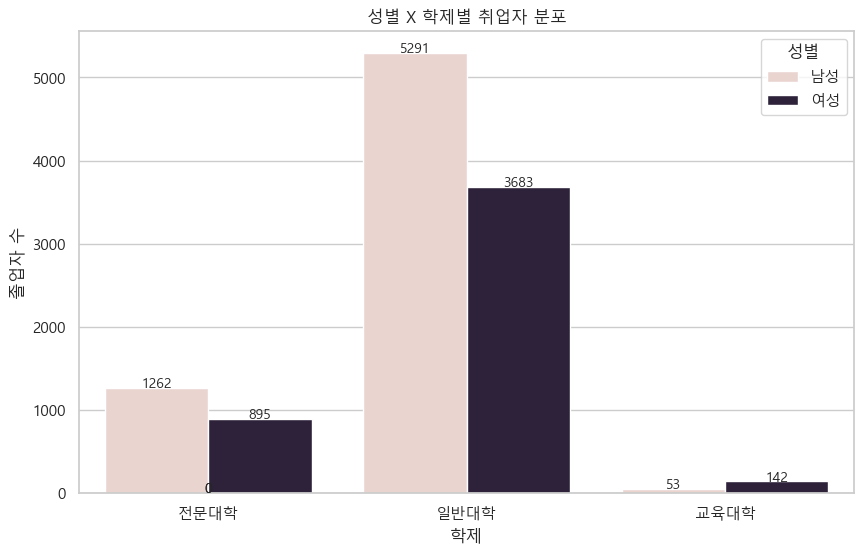

In [216]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=mz_data, x="school", hue="sex")
plt.title("성별 X 학제별 취업자 분포")
plt.xlabel("학제")
plt.ylabel("졸업자 수")
plt.legend(title="성별", labels=["남성", "여성"])
ax.set_xticklabels(["전문대학", "일반대학", "교육대학"])

# 막대 위에 값 표시 (소수점 제외)
for p in ax.patches:
    height = int(p.get_height())  # 소수점 제외
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

plt.show()

> 분석

일반대학의 취업자는 남성 5291명, 여성 3683명로 가장 많았으며,  
전문대학은 남성 1262명, 여성 895명으로, 일반대학 다음으로 많은 취업자 수를 보임.  
교육대학은 남녀 모두 200명 미만의 낮은 취업자 분포를 보임.

### (2) 전공별 X 학제별 취업자 분포

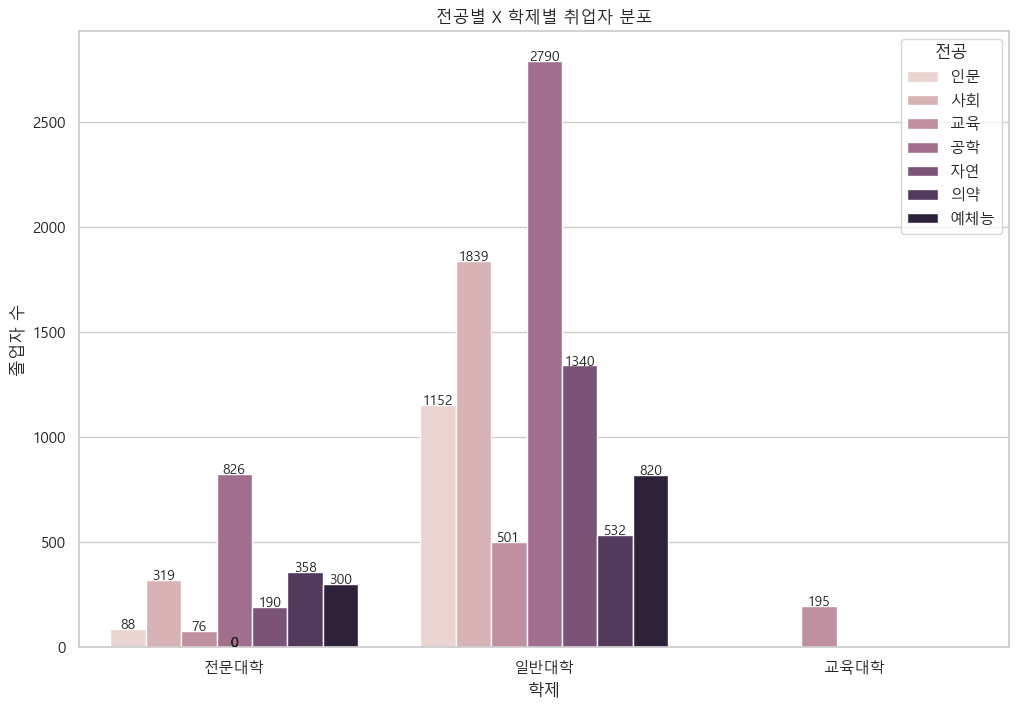

In [240]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=mz_data, x="school", hue="majorcat")
plt.title("전공별 X 학제별 취업자 분포")
plt.xlabel("학제")
plt.ylabel("졸업자 수")
plt.legend(title="전공", labels=["인문", "사회", "교육", "공학", "자연", "의약", "예체능"])
ax.set_xticklabels(["전문대학", "일반대학", "교육대학"])

for p in ax.patches:
    height = int(p.get_height())  
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

plt.show()

> 분석

전문대학과 일반대학 모두 공학계열 취업자 수가 2790명, 826명으로 가장 많고, 다음으로 사회계열 취업자 수가 1839명, 319명으로 가장 많은 양상을 보임.  
일반대학의 취업자 수는 공학, 사회, 자연, 인문, 예체능, 의약, 교육 순이며,  
전문대학의 취업자 수는 공학, 의약, 사회, 예체능, 자연, 인문, 교육 순임.
교육대학의 취업자 수는 195명임.

### (3) 성별 x 전공별 취업자 산업군 분포

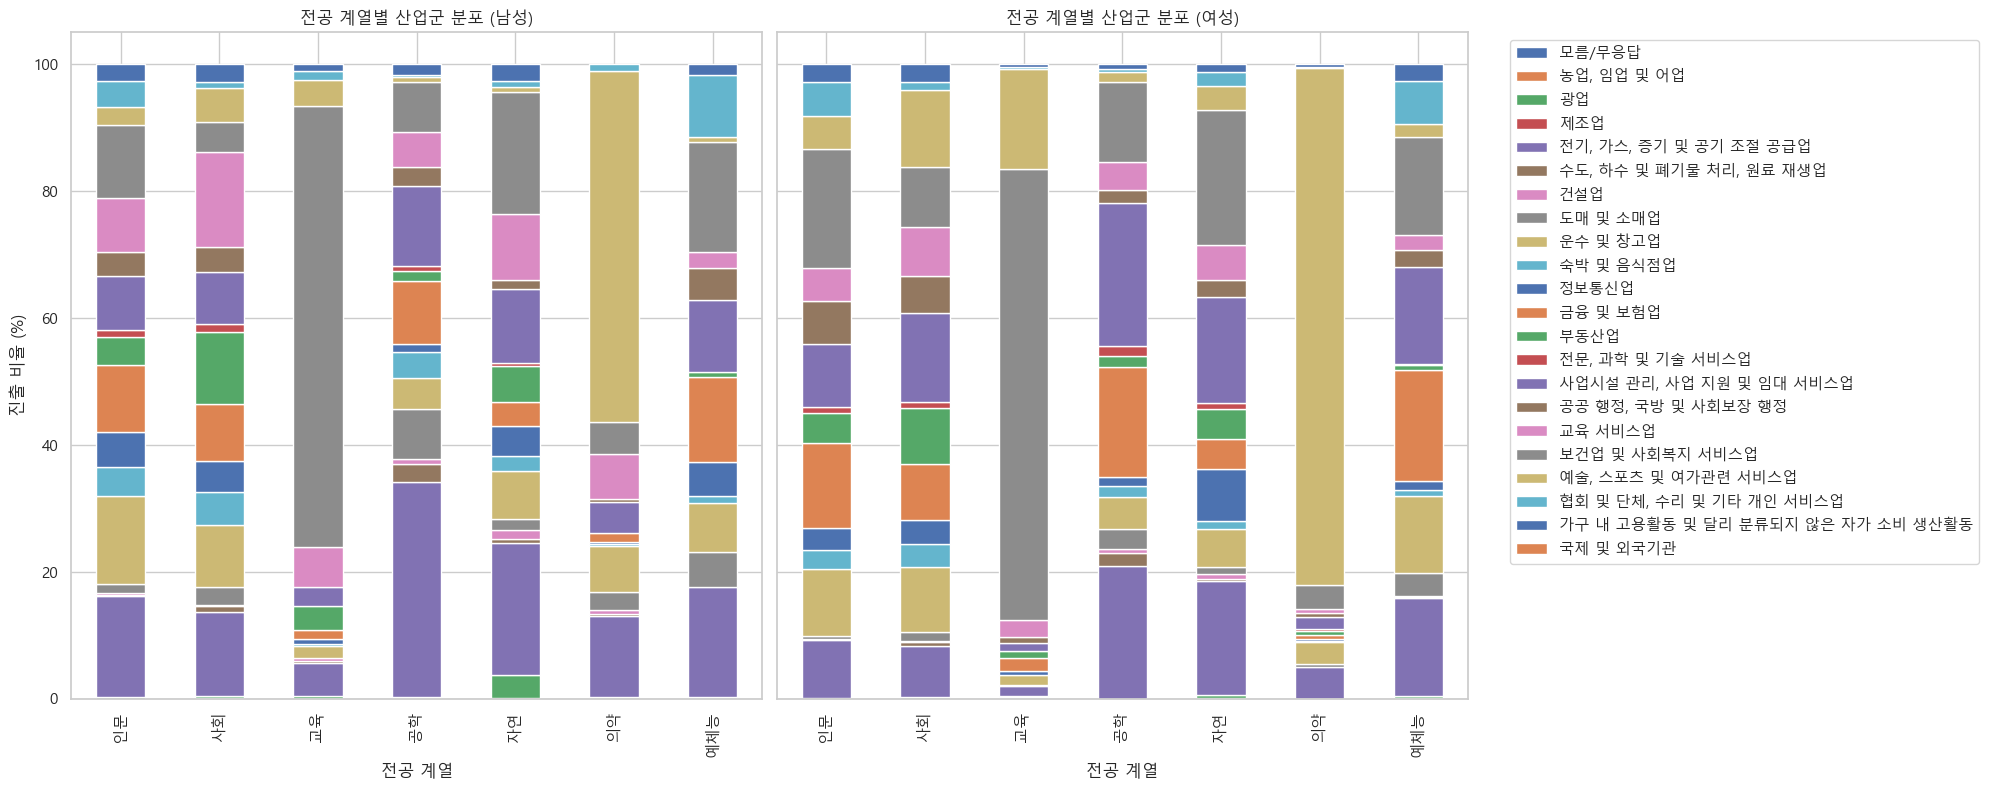

In [265]:
industries = [
    "모름/무응답",
    "농업, 임업 및 어업",
    "광업",
    "제조업",
    "전기, 가스, 증기 및 공기 조절 공급업",
    "수도, 하수 및 폐기물 처리, 원료 재생업",
    "건설업",
    "도매 및 소매업",
    "운수 및 창고업",
    "숙박 및 음식점업",
    "정보통신업",
    "금융 및 보험업",
    "부동산업",
    "전문, 과학 및 기술 서비스업",
    "사업시설 관리, 사업 지원 및 임대 서비스업",
    "공공 행정, 국방 및 사회보장 행정",
    "교육 서비스업",
    "보건업 및 사회복지 서비스업",
    "예술, 스포츠 및 여가관련 서비스업",
    "협회 및 단체, 수리 및 기타 개인 서비스업",
    "가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동",
    "국제 및 외국기관"
]

# 모든 데이터에 동일한 범주를 사용
male_data['industry'] = pd.Categorical(male_data['industry'], categories=range(-1, 21))
female_data['industry'] = pd.Categorical(female_data['industry'], categories=range(-1, 21))

# 남성 데이터 피벗 테이블
industry_distribution_male = male_data.pivot_table(index='majorcat', columns='industry', values='job', aggfunc='count', fill_value=0)
industry_distribution_male_percentage = industry_distribution_male.div(industry_distribution_male.sum(axis=1), axis=0) * 100

# 여성 데이터 피벗 테이블
industry_distribution_female = female_data.pivot_table(index='majorcat', columns='industry', values='job', aggfunc='count', fill_value=0)
industry_distribution_female_percentage = industry_distribution_female.div(industry_distribution_female.sum(axis=1), axis=0) * 100

# 피벗 차트 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# 남성 데이터 시각화
industry_distribution_male_percentage.plot(kind='bar', stacked=True, ax=axes[0], legend=False)
axes[0].set_title('전공 계열별 산업군 분포 (남성)')
axes[0].set_xlabel('전공 계열')
axes[0].set_ylabel('진출 비율 (%)')
axes[0].set_xticklabels(["인문", "사회", "교육", "공학", "자연", "의약", "예체능"])

# 여성 데이터 시각화
industry_distribution_female_percentage.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('전공 계열별 산업군 분포 (여성)')
axes[1].set_xlabel('전공 계열')
axes[1].set_ylabel('')
axes[1].set_xticklabels(["인문", "사회", "교육", "공학", "자연", "의약", "예체능"])

# 범례 설정
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=industries, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


> 분석

전공 계열별 산업군 분포에서  
교육계열 남성의 경우 건설업, 교육게열 여성의 경우 수도 하수 및 폐기물 처리, 원료 재생업이 가장 높게 나타났으며,  
의약계열 남성의 경우 도매 및 소매업, 의약계열 여성의 경우 교육 서비스업이 가장 높은 분포를 보였다.

해당 차트에서 인사이트를 발견하기 어려웠으며,  
이외 2019 취업통계조사 분석 보고서를 찾아보았으나 7대계열이 아닌 중계열 단위의 분석이 필요함을 확인함.  
이후 표준산업분류별 성별 취업자 현황 그래프와 표준산업분류별 취업자 상위 대계열 그래프를 그려 보완할 필요가 있음.

### (4) 성별 X 전공별 취업자 직무 유형 분포

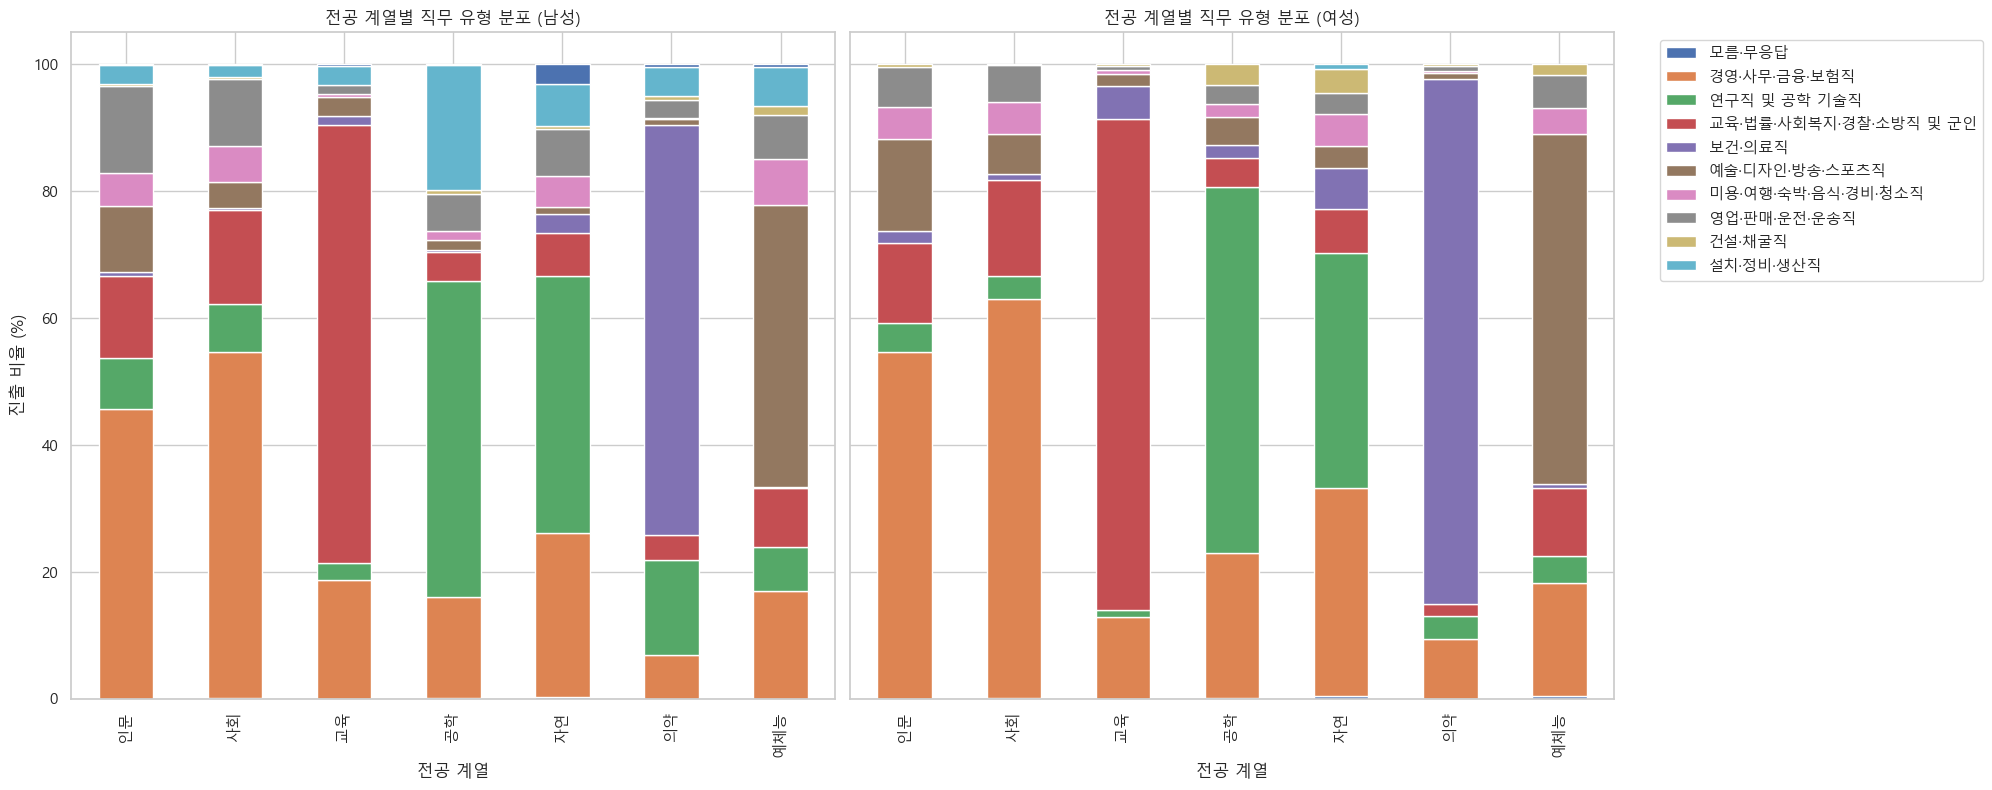

In [323]:
# 남성 데이터 필터링
male_data = mz_data[mz_data['sex'] == 1]
female_data = mz_data[mz_data['sex'] == 2]

# 남성 데이터 피벗 테이블
job_distribution_male = male_data.pivot_table(index='majorcat', columns='job', values='industry', aggfunc='count', fill_value=0)
job_distribution_male_percentage = job_distribution_male.div(job_distribution_male.sum(axis=1), axis=0) * 100  

# 여성 데이터 피벗 테이블
job_distribution_female = female_data.pivot_table(index='majorcat', columns='job', values='industry', aggfunc='count', fill_value=0)
job_distribution_female_percentage = job_distribution_female.div(job_distribution_female.sum(axis=1), axis=0) * 100  

# 피벗 차트 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# 남성 데이터 시각화
job_distribution_male_percentage.plot(kind='bar', stacked=True, ax=axes[0], legend=False)
axes[0].set_title('전공 계열별 직무 유형 분포 (남성)')
axes[0].set_xlabel('전공 계열')
axes[0].set_ylabel('진출 비율 (%)')
axes[0].set_xticklabels(["인문", "사회", "교육", "공학", "자연", "의약", "예체능"])

# 여성 데이터 시각화
job_distribution_female_percentage.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('전공 계열별 직무 유형 분포 (여성)')
axes[1].set_xlabel('전공 계열')
axes[1].set_xticklabels(["인문", "사회", "교육", "공학", "자연", "의약", "예체능"])

# 범례 설정
handles, labels = axes[1].get_legend_handles_labels()
job_list = [
    "모름·무응답",
    "경영·사무·금융·보험직",
    "연구직 및 공학 기술직",
    "교육·법률·사회복지·경찰·소방직 및 군인",
    "보건·의료직",
    "예술·디자인·방송·스포츠직",
    "미용·여행·숙박·음식·경비·청소직",
    "영업·판매·운전·운송직",
    "건설·채굴직",
    "설치·정비·생산직",
    "농림어업직"
]
axes[1].legend(handles=handles, labels=job_list, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

> 분석

전공 계열별 산업군 분포와 달리, 전공 계열별 직무 유형 분포에서는 해석 가능한 결과가 도출됨.  

남녀 모두 인문, 사회계열은 경영·사무·금융·보험직이 진출 비율이 가장 높았으며,  
교육계열은 교육·법률·사회복지·경찰·소방직 및 군인 직무 비율이 가장 높았음.  
공학과 자연계열은 연구직 및 공학 기술직 미율이 가장 높고,  
의약 계열은 보건·의료직이 가장 많았음.  
예체능 계열은 예술·디자인·방송·스포츠직이 가장 많은 진출 비율을 보임.

여성에 비해 남성의 경우 설치·정비·생산직 비율이 많게 나타남.

## 2. 대학 졸업자 임금 현황

### (1) 성별 X 학제별 월 평균 임금 현황

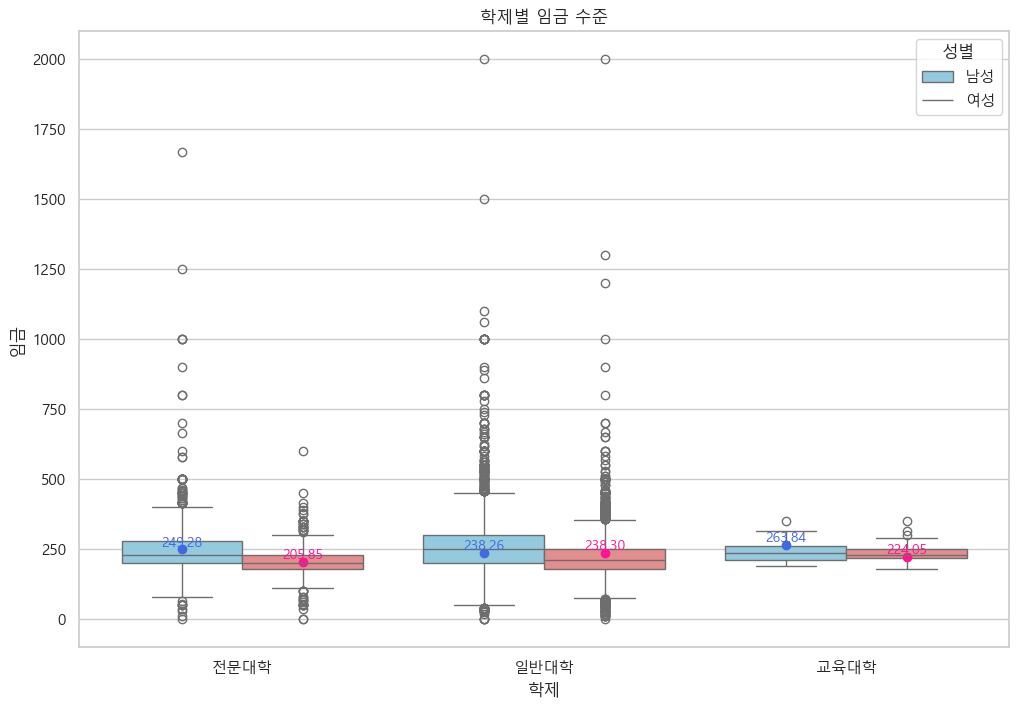

In [242]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=mz_data, x="school", y="a122", hue="sex", palette={1: "skyblue", 2: "lightcoral"})
plt.title("학제별 임금 수준")
plt.xlabel("학제")
plt.ylabel("임금")

# x축 레이블 설정
ax.set_xticklabels(["전문대학", "일반대학", "교육대학"])

# 평균값 마커 및 숫자 표기 (성별에 따라 구분)
for school in mz_data['school'].unique():
    for sex in mz_data['sex'].unique():
        avg = mz_data[(mz_data['school'] == school) & (mz_data['sex'] == sex)]['a122'].mean()
        i = np.where(mz_data['school'].unique() == school)[0][0]
        offset = -0.2 if sex == 1 else 0.2
        color = 'royalblue' if sex == 1 else 'deeppink'
        ax.plot(i + offset, avg, 'o', color=color)
        ax.text(i + offset, avg, f'{avg:.2f}', ha='center', va='bottom', color=color)

plt.legend(title="성별", labels=["남성", "여성"])
plt.show()

> 분석

월 평균 소득의 평균값은 모든 학제가 비슷하게 나타나지만,  
일반적으로 남성의 월 소득 평균과, 중앙값 모두 여성에 비해 높게 나타남.

학제별 월 평균 소득은  
남성의 경우 교육대학 263만, 전문대학 245만, 일반대학 238만 순이었으며,  
여성의 경우 일반대학 239만, 교육대학 224만, 일반대학 205만 순으로 나타남.  

사분위 범위는 일반대학이 가장 넓고, 교육대학이 가장 좁은 것으로 나타났음.  
일반대학과 전문대학은 월 임금 400 이상의 이상치가 많이 분포함과 동시에 월 임금 0에 수렴하는 이상치도 다수 존재함.

### (2) 성별 X 전공별 월 평균 임금 현황

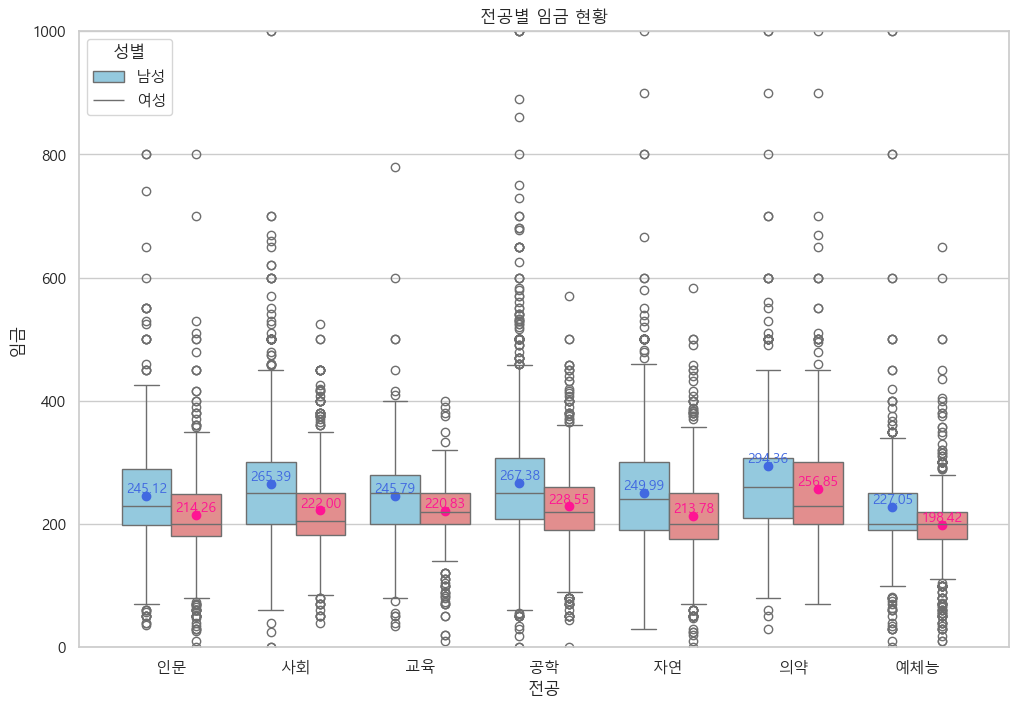

In [243]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=mz_data, x="majorcat", y="a122", hue="sex", palette={1: "skyblue", 2: "lightcoral"})
plt.title("전공별 임금 현황")
plt.xlabel("전공")
plt.ylabel("임금")
plt.ylim(0, 1000)
plt.legend(title="성별", labels=["남성", "여성"])
ax.set_xticklabels(["인문", "사회", "교육", "공학", "자연", "의약", "예체능"])

# 평균값 마커 및 숫자 표기 (성별에 따라 구분)
for i, major in enumerate(mz_data['majorcat'].unique()):
    for j, sex in enumerate(mz_data['sex'].unique()):
        avg = mz_data[(mz_data['majorcat'] == major) & (mz_data['sex'] == sex)]['a122'].mean()
        offset = -0.2 if sex == 1 else 0.2
        color = 'royalblue' if sex == 1 else 'deeppink'
        ax.plot(i + offset, avg, 'o', color=color)
        ax.text(i + offset, avg, f'{avg:.2f}', ha='center', va='bottom', color=color)

plt.show()

> 분석

전공별 평균 임금의 차이는 크지 않으나,  
남성의 경우 의약과 사회, 공학 각각 294만, 265만, 267만으로 높고, 예체능이 227만으로 가장 낮게 나타남.  
여성의 경우 의약과 공학, 교육 각각 256만, 228만, 220만으로 높고, 예체능이 198만으로 가장 낮게 나타남.  

남성이 여성에 비해 평균 임금이 높게 나타났으며,  
교육계열과 예체능은 비교적 사분위범위가 적음.  

## 3. 대학 졸업자 만족도 현황

### (1) 성별 X 학제별 대학 만족도

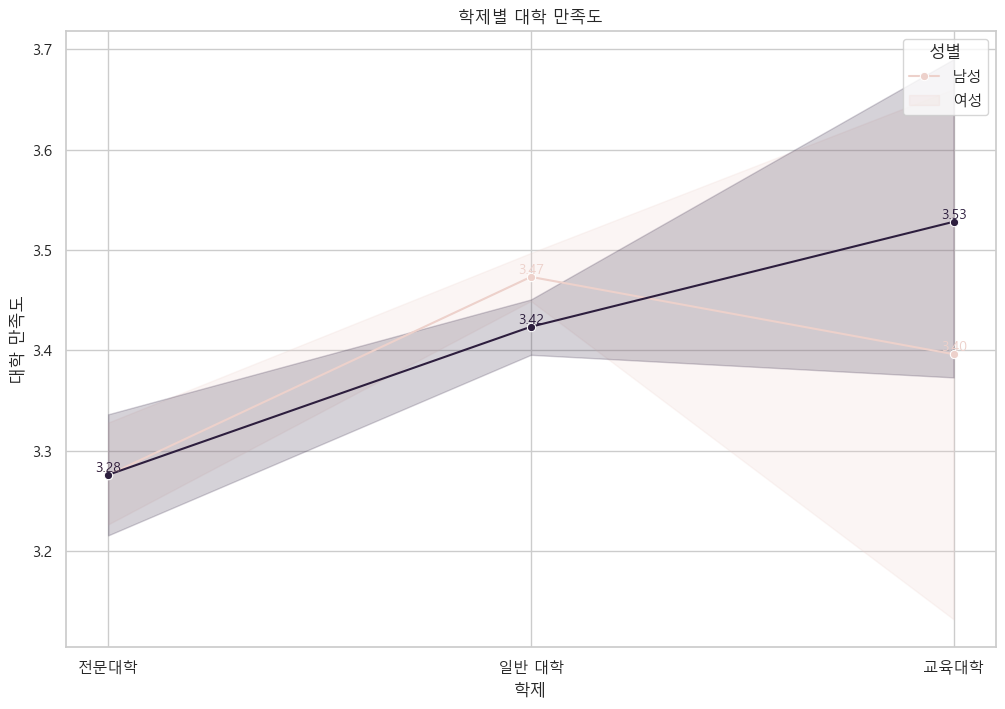

In [266]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=mz_data, x="school", y="f072", hue="sex", marker="o")
plt.title("학제별 대학 만족도")
plt.xlabel("학제")
plt.ylabel("대학 만족도")
plt.xticks(ticks=[1, 2, 3], labels=["전문대학", "일반 대학", "교육대학"])

# 숫자 표시
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', color=line.get_color())

plt.legend(title="성별", labels=["남성", "여성"])
plt.show()

> 분석

전공 만족도 역시 성별, 학제별에 따른 차이가 크게 나타나지 않고, 평균 3.0 이상의 만족도를 보임.

여성의 만족도는 교육대학, 일반대학, 전문대학 순으로 높고
남성의 만족도는 일반대학, 교육대학, 전문대학 순으로 높았음.

만족도에서 전문대학은 비슷하며, 일반대학은 남성이 0.05, 교육대학은 여성이 0.12 정도 높음.

교육대학의 경우 취업자 수가 작아 신뢰구간이 넓게 나타나는 것으로 판단됨.

### (2) 성별 X 학제별 전공 만족도

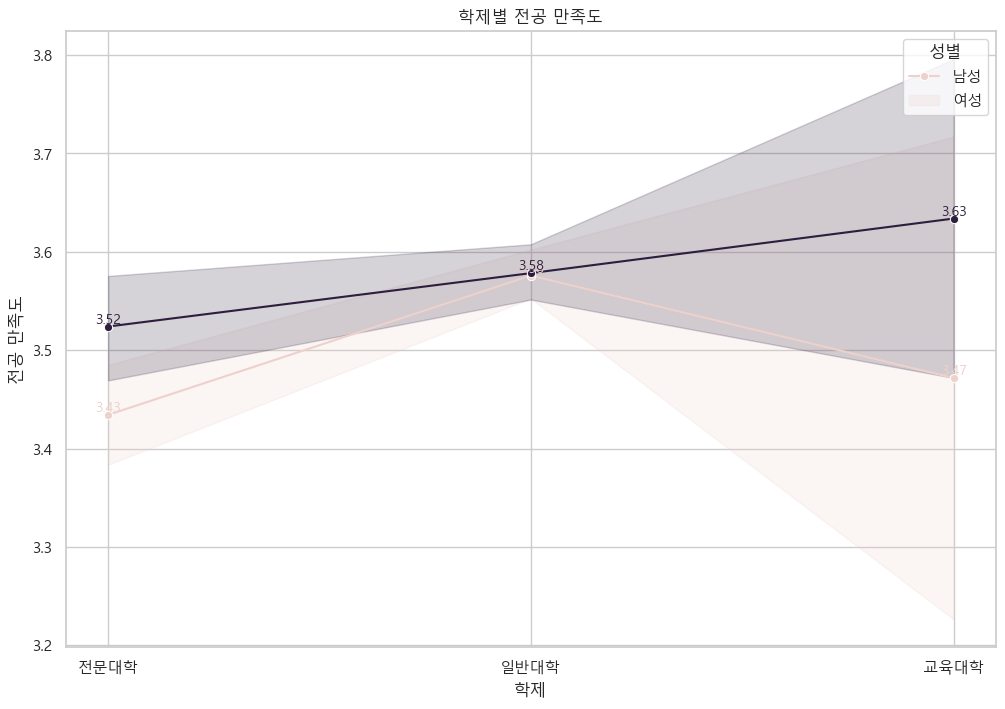

In [267]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=mz_data, x="school", y="f071", hue="sex", marker="o")
plt.title("학제별 전공 만족도")
plt.xlabel("학제")
plt.ylabel("전공 만족도")
plt.xticks(ticks=[1, 2, 3], labels=["전문대학", "일반대학", "교육대학"])

# 숫자 표시
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', color=line.get_color())

plt.legend(title="성별", labels=["남성", "여성"])
plt.show()

> 분석

전공 만족도 역시 성별, 학제별에 따른 차이가 크게 나타나지 않고, 평균 3.0 이상의 만족도를 보임.

남성의 만족도는 일반대학, 교육대학, 전문대학 순으로 높고
여성의 만족도는 교육대학, 일반대학, 전문대학 순으로 높았음.

만족도에서 전문대학은 여성이 0.09 높고, 일반대학은 비슷하며, 교육대학은 여성이 0.16 높음.

### (3) 성별 X 학제별 직장 만족도

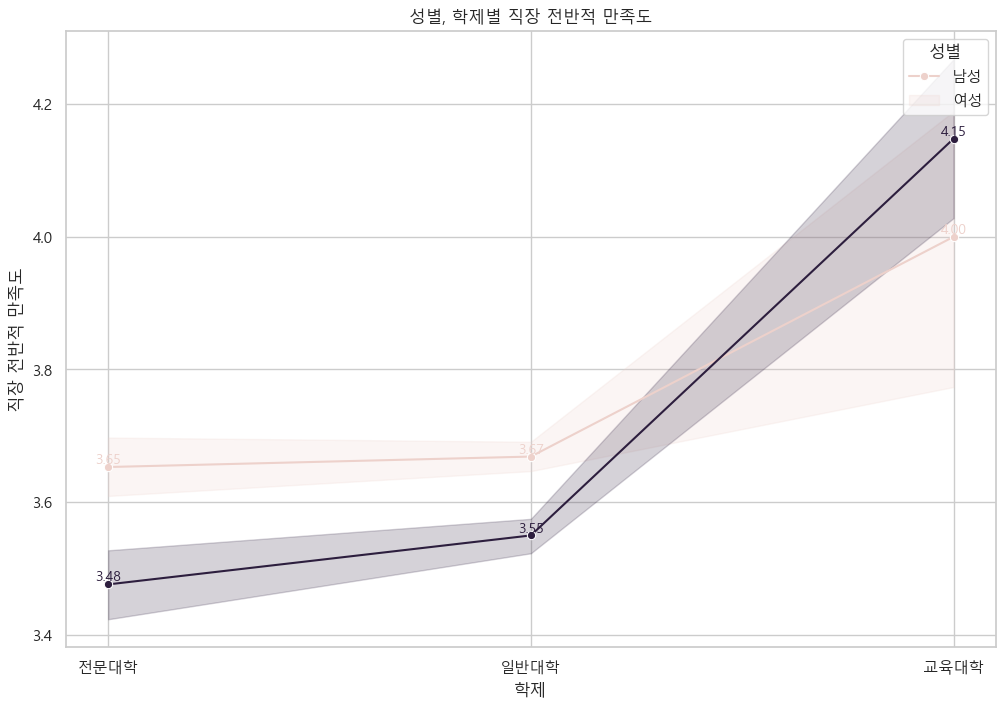

In [268]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=mz_data, x="school", y="a140", hue="sex", marker="o")
plt.title("성별, 학제별 직장 전반적 만족도")
plt.xlabel("학제")
plt.ylabel("직장 전반적 만족도")
plt.xticks(ticks=[1, 2, 3], labels=["전문대학", "일반대학", "교육대학"])

# 숫자 표시
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', color=line.get_color())

plt.legend(title="성별", labels=["남성", "여성"])
plt.show()

> 분석

직장 만족도는 평균 3.0 이상의 만족도를 보이나,  
교육대학의 직장 만족도가 여성의 경우 4.15, 남성의 경우 4.0으로 높은 수치를 보이고 있음.  

남성과 여성의 직장 만족도 모두 교육대학, 일반대학, 전문대학 순으로 높았음.  

만족도에서 전문대학은 남성이 0.17 높고, 일반대학은 남성이 0.12 높았으며, 교육대학은 여성이 0.15 높음.  

### (4) 성별 X 전공별 대학 만족도

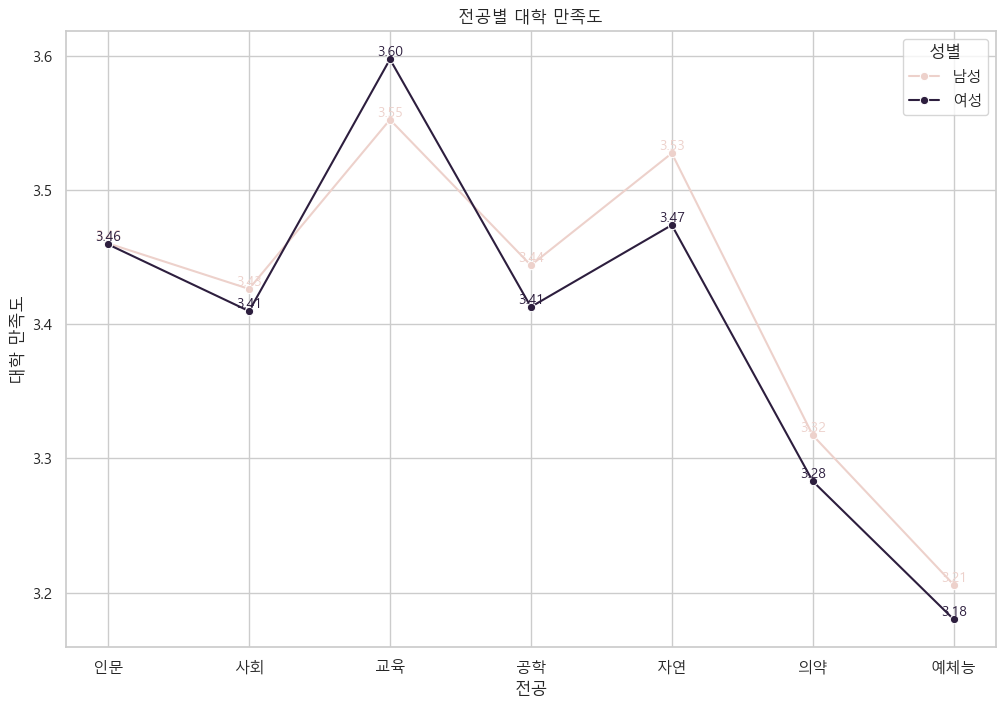

In [271]:
# 전공 계열 이름 지정
majorcat_mapping = {
    1: "인문",
    2: "사회",
    3: "교육",
    4: "공학",
    5: "자연",
    6: "의약",
    7: "예체능"
}

# 전공 계열 이름을 문자열로 변환
mz_data["majorcat"] = mz_data["majorcat"].map(majorcat_mapping)

plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=mz_data, x="majorcat", y="f072", hue="sex", marker="o", ci=None)
plt.title("전공별 대학 만족도")
plt.xlabel("전공")
plt.ylabel("대학 만족도")
plt.legend(title="성별", labels=["남성", "여성"])

# 각 포인트 옆에 숫자 표시
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', color=line.get_color())

plt.show()

> 분석

만족도 측면에서, 모두 3.0 이상의 만족도를 보이며 큰 차이는 없으나  
여성의 경우 교육, 자연, 인문, 사회 / 공학, 의약, 예체능 순으로 만족하였고  
남성의 경우 교육, 자연, 인문, 공학, 사회, 의약, 예체능 순으로 만족함.

### (5) 성별 X 전공별 전공 만족도

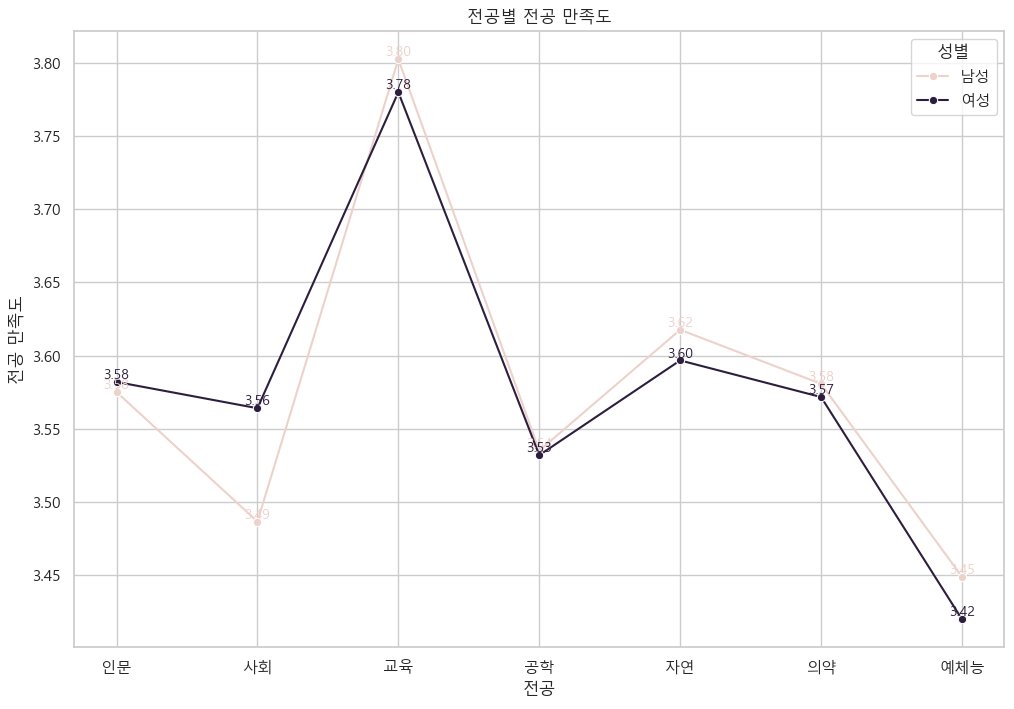

In [272]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=mz_data, x="majorcat", y="f071", hue="sex", marker="o", ci=None)
plt.title("전공별 전공 만족도")
plt.xlabel("전공")
plt.ylabel("전공 만족도")
plt.legend(title="성별", labels=["남성", "여성"])
ax.set_xticklabels(["인문", "사회", "교육", "공학", "자연", "의약", "예체능"])

# 각 포인트 옆에 숫자 표시
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', color=line.get_color())

plt.show()

> 분석

만족도 측면에서, 모두 3.0 이상의 만족도를 보이며 큰 차이는 없으나  
여성의 경우 교육, 자연, 인문, 사회, 공학, 의약, 예체능 순으로 만족하였고  
남성의 경우 교육, 자연, 의약, 인문, 공학, 사회, 예체능 순으로 만족함.

### (6) 성별 X 전공별 직장 만족도

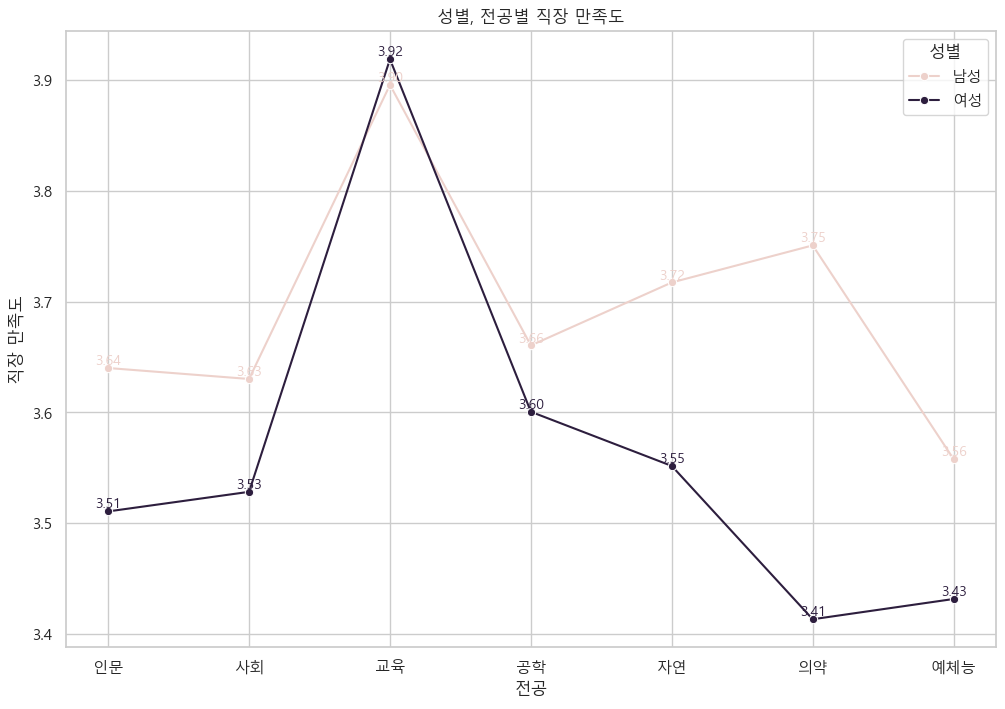

In [274]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=mz_data, x="majorcat", y="a140", hue="sex", marker="o", ci=None)
plt.title("성별, 전공별 직장 만족도")
plt.xlabel("전공")
plt.ylabel("직장 만족도")

# 각 포인트 옆에 숫자 표시
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', color=line.get_color())

plt.legend(title="성별", labels=["남성", "여성"])
plt.show()


> 분석

직장 만족도의 경우, 남성 여성 모두 교육계열이 가장 높았으며,  
여성은 의약과, 예체능에서 남성은 예체능에서 가장 낮은 직장 만족도를 보임.  

교육분야를 제외한 모든 분야에서 남성의 만족도가 여성의 직장 만족도보다 높았음.

### (7) 전공별 X 유형별 직장 만족도

In [351]:
# 만족도 항목 리스트와 매핑
satisfaction_columns = [f'a{i}' for i in range(126, 142)]
satisfaction_mapping = {
    'a126': '임금',
    'a127': '고용 안정성',
    'a128': '직무내용',
    'a129': '근무환경',
    'a130': '근로시간',
    'a131': '개인 발전 가능성',
    'a132': '인간관계',
    'a133': '복리 후생',
    'a134': '인사체계(승진 제도)',
    'a135': '일에 대한 사회적 평판',
    'a136': '자율성과 권한',
    'a137': '일자리에 대한 사회적 평판',
    'a138': '적성 일치',
    'a139': '직무교육훈련',
    'a140': '전반적 만족도(직장)',
    'a141': '전반적 만족도(업무)'
}

# 데이터 전처리
melted_df = mz_data.melt(id_vars=['majorcat'], value_vars=satisfaction_columns, 
                         var_name='satisfaction_item', value_name='satisfaction_value')
melted_df['satisfaction_item'] = melted_df['satisfaction_item'].map(satisfaction_mapping)

In [352]:
# 전공 계열 이름 매핑
majorcat_mapping = {
    1: "인문",
    2: "사회",
    3: "교육",
    4: "공학",
    5: "자연",
    6: "의약",
    7: "예체능"
}

melted_df['majorcat'] = melted_df['majorcat'].map(majorcat_mapping)

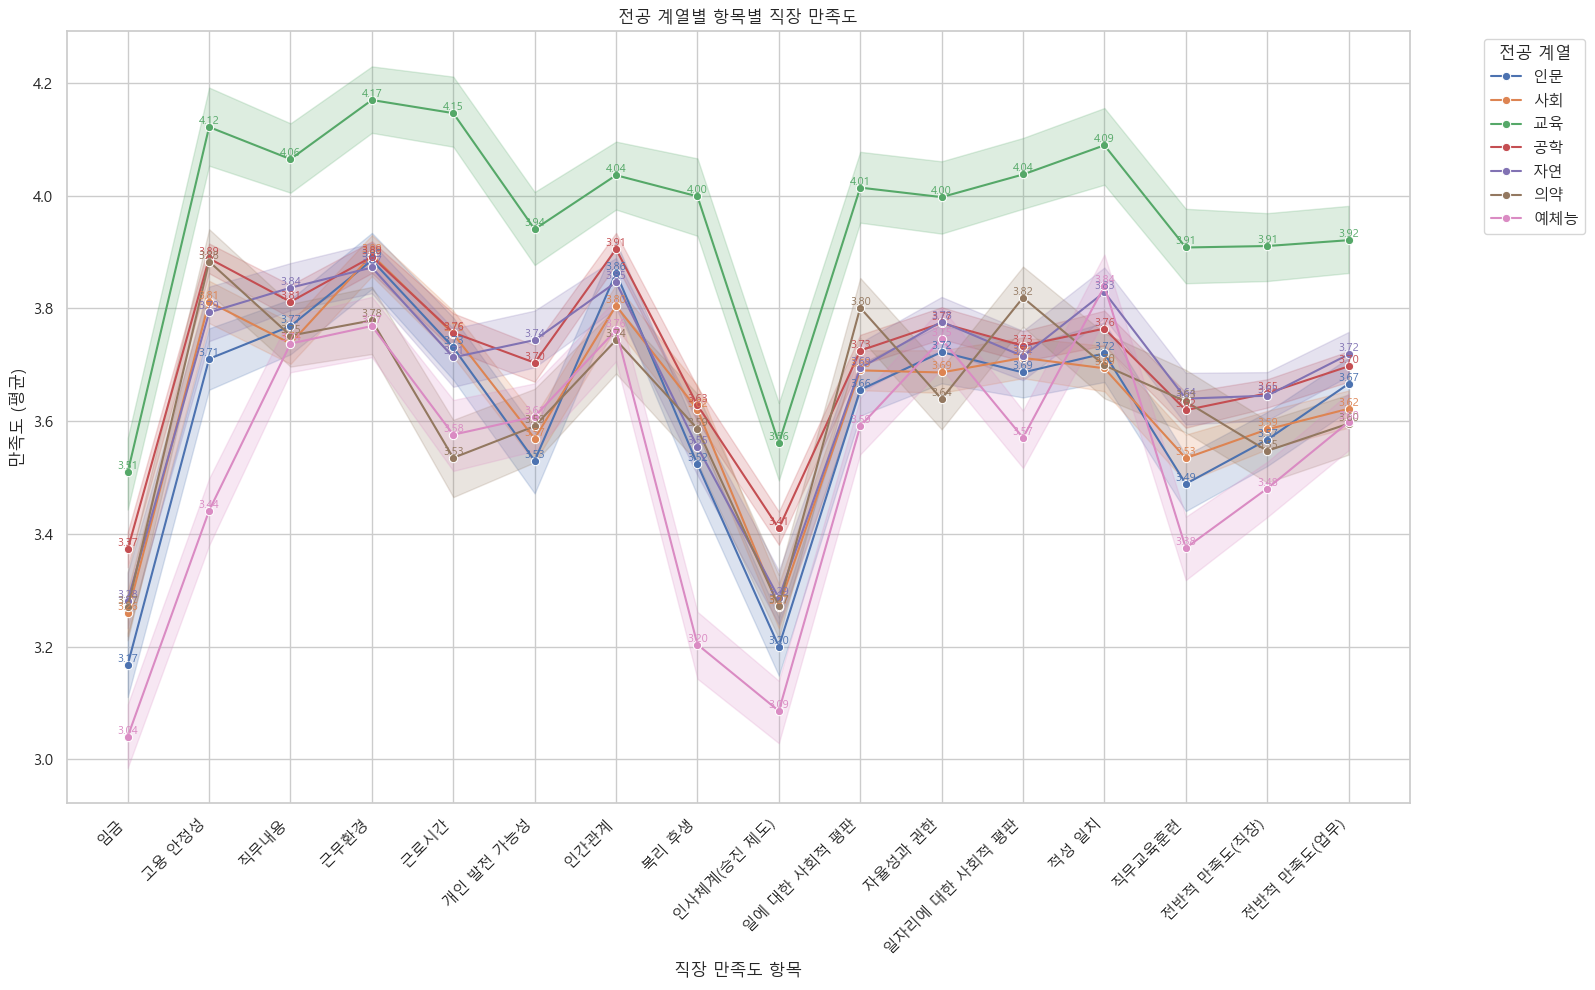

In [353]:
plt.figure(figsize=(16, 10))
ax = sns.lineplot(data=melted_df, x='satisfaction_item', y='satisfaction_value', hue='majorcat', marker='o')

# 각 포인트 옆에 숫자 표시
for line in ax.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', color=line.get_color(), fontsize=8)

plt.title("전공 계열별 항목별 직장 만족도")
plt.xlabel("직장 만족도 항목")
plt.ylabel("만족도 (평균)")
plt.xticks(rotation=45, ha='right')  # x축 라벨 회전

# 범례 추가
plt.legend(title="전공 계열", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

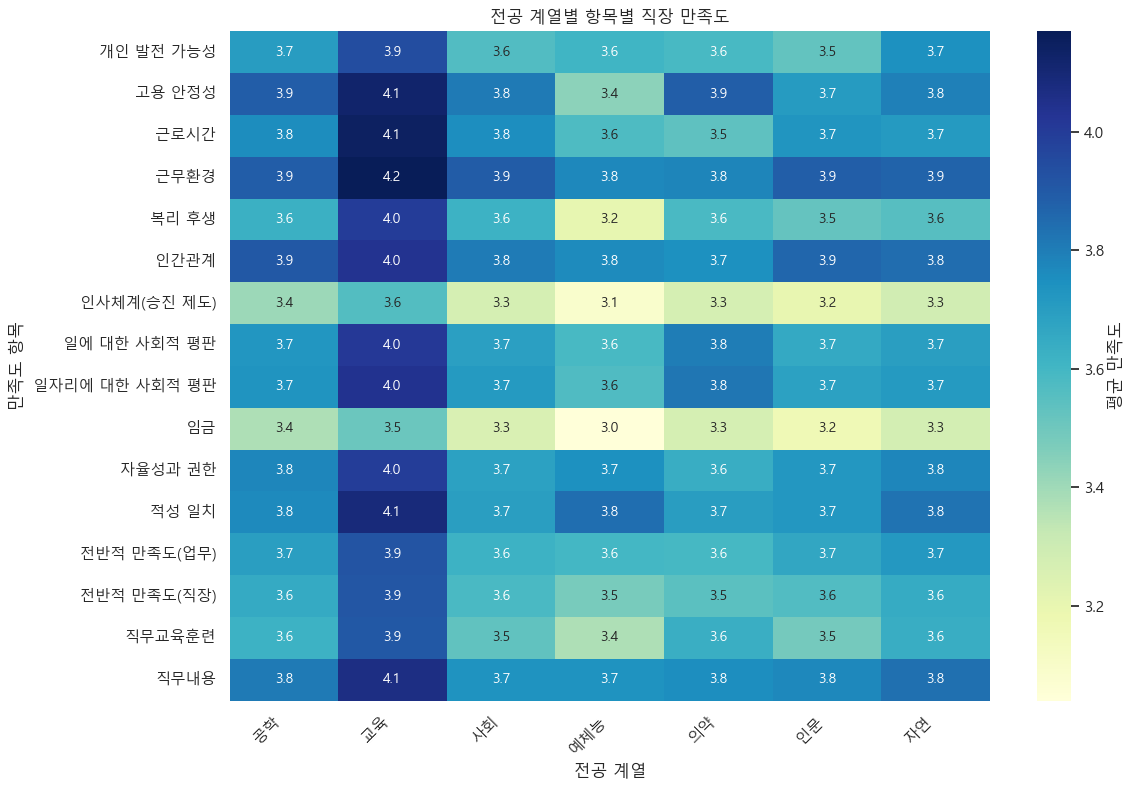

In [354]:
# 피벗 테이블 생성
heatmap_data = melted_df.pivot_table(index='satisfaction_item', columns='majorcat', values='satisfaction_value', aggfunc='mean')

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f", cbar_kws={'label': '평균 만족도'})
plt.title('전공 계열별 항목별 직장 만족도')
plt.xlabel('전공 계열')
plt.ylabel('만족도 항목')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()
plt.show()

> 분석

다른 전공 계열에 비해 교육계열의 만족도는 대부분의 항목에서 3.9 이상의 높은 만족도를 보였으나,  
인사체계와 임금이 각각  3.6, 3.5로 비교적 낮은 만족도를 보였음.  

그러나 인사체계와 임금은 모든 전공계열에서 고루 낮게 만족하는 항목으로 3.0~3.6 사이의 분포를 보임.  

특히 예체능 계열은 타 계열에 비해 대다수의 만족도 항목에서 낮은 수치를 보였으며,  
특히 임금 3.0, 인사체계 3.1, 복리후생 3.2에서 낮은 만족도를 나타냈음.
그러나 예체능 계열에서 적성일치와 인간관계, 근무환경이 3.8, 자율성과 권한은 3.7로 타 계열과 비슷하게 높은 수치를 나타냈음.

### (8) 직무 유형별 X 유형별 직장 만족도

In [361]:
# 직무유형 매핑
job_list = [
    "모름·무응답",
    "경영·사무·금융·보험직",
    "연구직 및 공학 기술직",
    "교육·법률·사회복지·경찰·소방직 및 군인",
    "보건·의료직",
    "예술·디자인·방송·스포츠직",
    "미용·여행·숙박·음식·경비·청소직",
    "영업·판매·운전·운송직",
    "건설·채굴직",
    "설치·정비·생산직",
    "농림어업직"
]

# job 칼럼 매핑
job_mapping = dict(zip(range(-1, 11), job_list))
mz_data['job'] = mz_data['job'].map(job_mapping)

# 데이터 전처리
melted_df = mz_data.melt(id_vars=['job'], value_vars=satisfaction_columns, 
                         var_name='satisfaction_item', value_name='satisfaction_value')
melted_df['satisfaction_item'] = melted_df['satisfaction_item'].map(satisfaction_mapping)

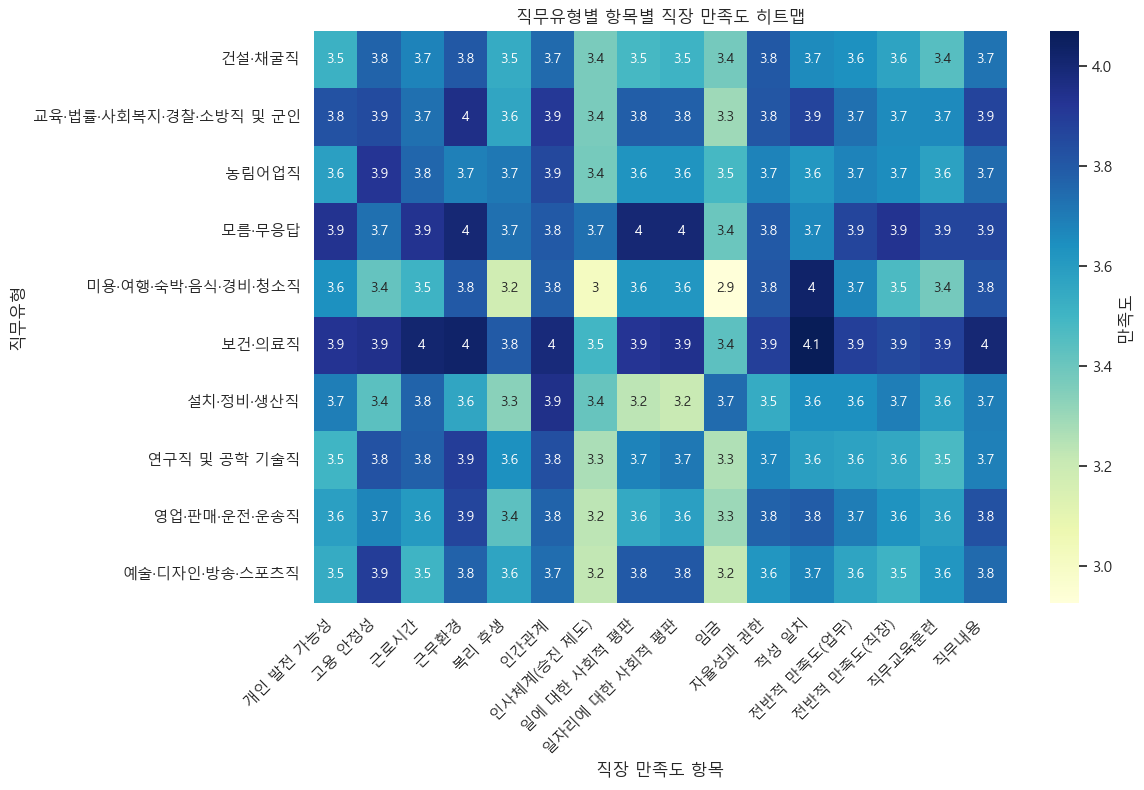

In [362]:
# 히트맵 그리기
heatmap_data = melted_df.pivot_table(index='job', columns='satisfaction_item', values='satisfaction_value', fill_value=0)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': '만족도'})

plt.title("직무유형별 항목별 직장 만족도 히트맵")
plt.xlabel("직장 만족도 항목")
plt.ylabel("직무유형")
plt.xticks(rotation=45, ha='right')  # x축 라벨 회전

plt.tight_layout()
plt.show()

> 분석

'보건·의료직'의 경우, 모든 직장 만족도 항목에서 3.4 이상으로 타 직무유형에 비해 높은 만족도를 보였음.  
'미용·여행·숙박·음식·경비·청소직'의 경우, 임금 2.9, 인사체계 3, 복리후생 3.2로 낮은 만족도를 보임.  

인사체계, 임금 항목은 '연구직 및 공학 기술직', '영업·판매·운전·운송직', '예술·디자인·방송·스포츠직'에서도 낮은 수치를 보임.

## 4. 대학 졸업자 이직 현황

### (1) 성별 X 학제별 X 전공별 이직률

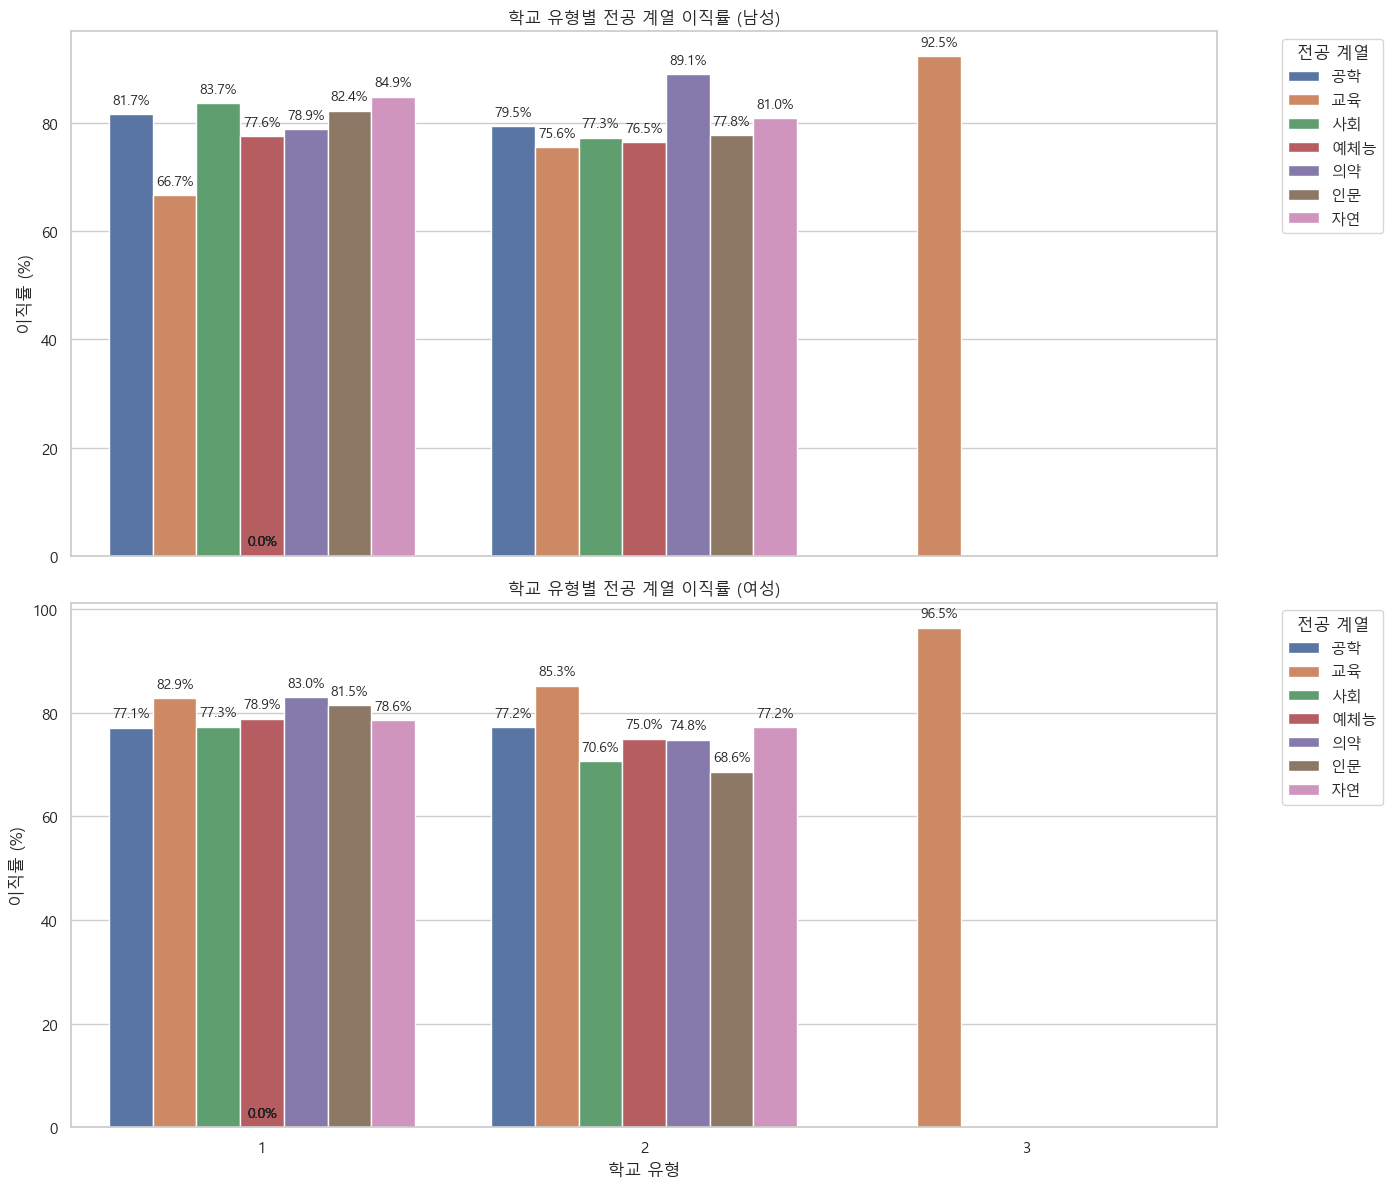

In [414]:
# '이직 여부' 컬럼을 기반으로 'is_job_change' 컬럼 생성 ('2'는 이직자, '1'은 비이직자)
mz_data['is_job_change'] = mz_data['이직여부'].apply(lambda x: 1 if x == 2 else 0)

# 전공 계열 및 성별 매핑
majorcat_mapping = {
    1: "인문",
    2: "사회",
    3: "교육",
    4: "공학",
    5: "자연",
    6: "의약",
    7: "예체능"
}
sex_mapping = {
    1: "남성",
    2: "여성"
}
mz_data['majorcat'] = mz_data['majorcat'].map(majorcat_mapping)
mz_data['sex'] = mz_data['sex'].map(sex_mapping)

# 그룹별 이직률 계산 함수
def calculate_job_change_rate(mz_data, group_cols):
    grouped_data = mz_data.groupby(group_cols).agg(
        sum_is_job_change=('is_job_change', 'sum'),
        count_is_job_change=('is_job_change', 'count')
    ).reset_index()
    grouped_data['job_change_rate'] = (grouped_data['sum_is_job_change'] / grouped_data['count_is_job_change']) * 100
    return grouped_data

# 학교 유형별 전공 계열 이직률 데이터프레임 생성
school_majorcat_df = calculate_job_change_rate(mz_data, ['school', 'majorcat', 'sex'])

# 이직률 시각화
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# 남성 그래프
male_data = school_majorcat_df[school_majorcat_df['sex'] == '남성']
male_plot = sns.barplot(data=male_data, x='school', y='job_change_rate', hue='majorcat', ax=axes[0])
axes[0].set_title('학교 유형별 전공 계열 이직률 (남성)')
axes[0].set_ylabel('이직률 (%)')

# 숫자 라벨 추가
for p in male_plot.patches:
    male_plot.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# 여성 그래프
female_data = school_majorcat_df[school_majorcat_df['sex'] == '여성']
female_plot = sns.barplot(data=female_data, x='school', y='job_change_rate', hue='majorcat', ax=axes[1])
axes[1].set_title('학교 유형별 전공 계열 이직률 (여성)')
axes[1].set_xlabel('학교 유형')
axes[1].set_ylabel('이직률 (%)')

# 숫자 라벨 추가
for p in female_plot.patches:
    female_plot.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# 범례 추가
handles1, labels1 = axes[0].get_legend_handles_labels()
handles2, labels2 = axes[1].get_legend_handles_labels()
if handles1:
    axes[0].legend(handles=handles1, labels=labels1, title='전공 계열', bbox_to_anchor=(1.05, 1), loc='upper left')
if handles2:
    axes[1].legend(handles=handles2, labels=labels2, title='전공 계열', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


> 분석

전문대학 남성의 이직률 경우, 교육계열이 66.7%로 가장 낮고 자연계열이 84.9%로 가장 높았음.  
전문대학 여성의 경우, 공학계열이 77.1%로 가장 낮고 의약계열이 83%로 가장 높았음.  

일반대학 남성의 경우, 교육계열이 75.6으로 가장 낮고 의약계열이 89.1%로 가장 높았음.  
일반대학 여성의 경우, 인문계열이 68.6%로 가장 낮고 교육계열이 85.3%로 가장 높았음.

교육대는 남녀 모두 90% 이상의 높은 이직률을 보임.


## 5. 대학 졸업자 취업 관련 상관 관계 분석 

### (1) 취업 요인과 취업 상황, 만족도 간 상관관계 분석

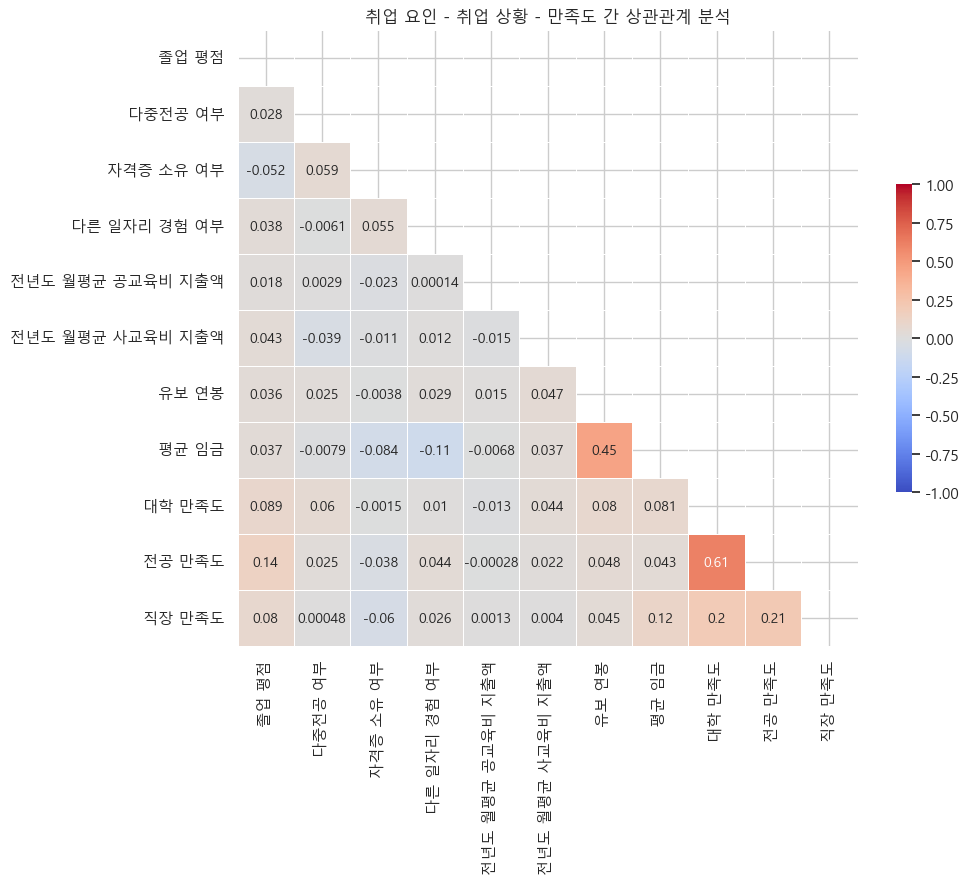

In [430]:
# 데이터 컬럼
correlation_data = df_cleaned[['f074', 'f023', 'a153', 'r025', 'r026', 'e001', 'j021', 'a122', 'f072', 'f071', 'a140']]

# 컬럼명 지정
correlation_data.columns = [
    '졸업 평점', 
    '다중전공 여부',
    '자격증 소유 여부',
    '다른 일자리 경험 여부',
    '전년도 월평균 공교육비 지출액',
    '전년도 월평균 사교육비 지출액',
    '유보 연봉',
    '평균 임금', 
    '대학 만족도', 
    '전공 만족도', 
    '직장 만족도'
]

# 상관계수 계산
correlation_matrix = correlation_data.corr()

# 삼각형 마스크를
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            annot=True, 
            mask=mask, 
            linewidths=.5, 
            cbar_kws={"shrink": .5}, 
            vmin=-1, vmax=1)
plt.title("취업 요인 - 취업 상황 - 만족도 간 상관관계 분석")
plt.show()

> 분석

대부분의 취업 요인은 평균 임금 및 만족도와 약한 상관관계를 가짐  
대학 및 전공 만족도와 직장 만족도 역시 약한 상관관계를 가짐

유보 연봉과 평균 임금은 0.45의 상관관계를 가짐.

대학 만족도와 전공 만족도는 0.61 수준의 강한 상관관계를 가짐

### (2) 부모 요인과 자녀 대학, 직장 생활 간 상관관계 분석

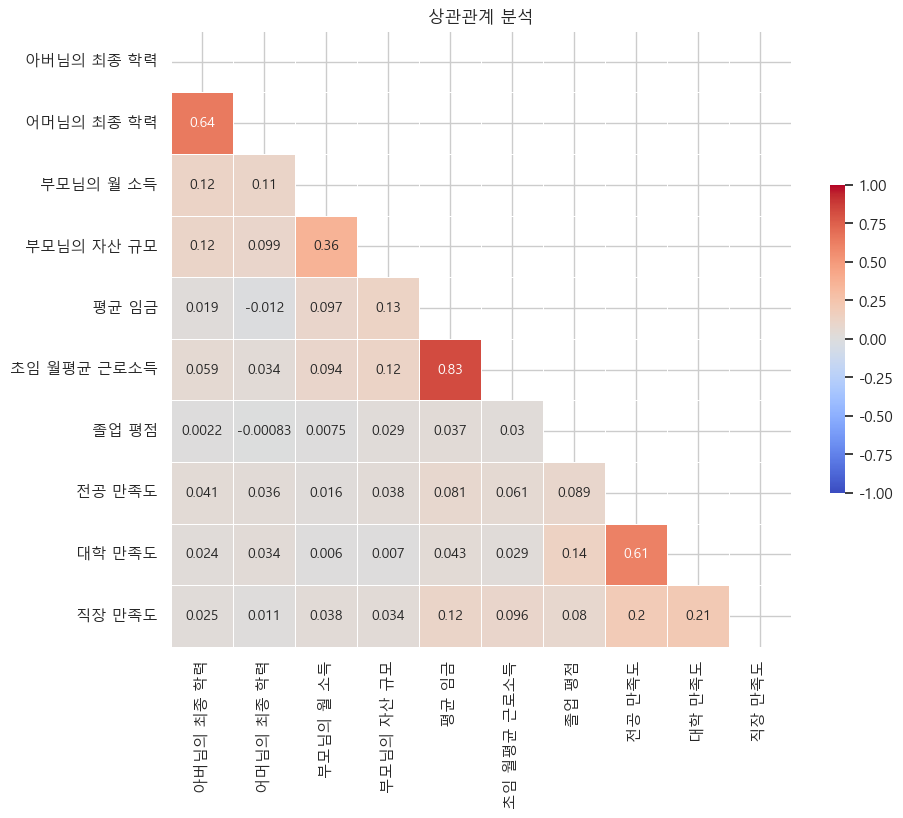

In [429]:
# 데이터 선택
correlation_data2 = df_cleaned[['p028z', 'p031z', 'p035', 'p036', 'a122', 'a125', 'f074', 'f072', 'f071', 'a140']]

# 컬럼 이름 바꾸기
correlation_data2.columns = [
    '아버님의 최종 학력',
    '어머님의 최종 학력',
    '부모님의 월 소득', 
    '부모님의 자산 규모', 
    '평균 임금', 
    '초임 월평균 근로소득',
    '졸업 평점', 
    '전공 만족도', 
    '대학 만족도', 
    '직장 만족도'
]

# 상관계수 계산
correlation_matrix2 = correlation_data2.corr()

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(correlation_matrix2, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, 
            cmap='coolwarm', 
            annot=True, 
            mask=mask, 
            linewidths=.5, 
            cbar_kws={"shrink": .5}, 
            vmin=-1, vmax=1)
plt.title("상관관계 분석")
plt.show()

> 분석

어머님의 최종학력과 아버님의 최종학력,  
부모의 자산규모와 월 소득,  
자녀의 초임 월평균 근로소득과 평균 임금,  
자녀의 대학 만족도와 전공 만족도만이 높은 상관관계를 보였음.

부모가 자녀의 평균 임금, 졸업 평점, 전공 만족도, 대학 만족도, 직장 만족도에 미치는 영향은 매우 낮음.

### (3) 직장 요인과 직장 만족도 간 상관관계 분석

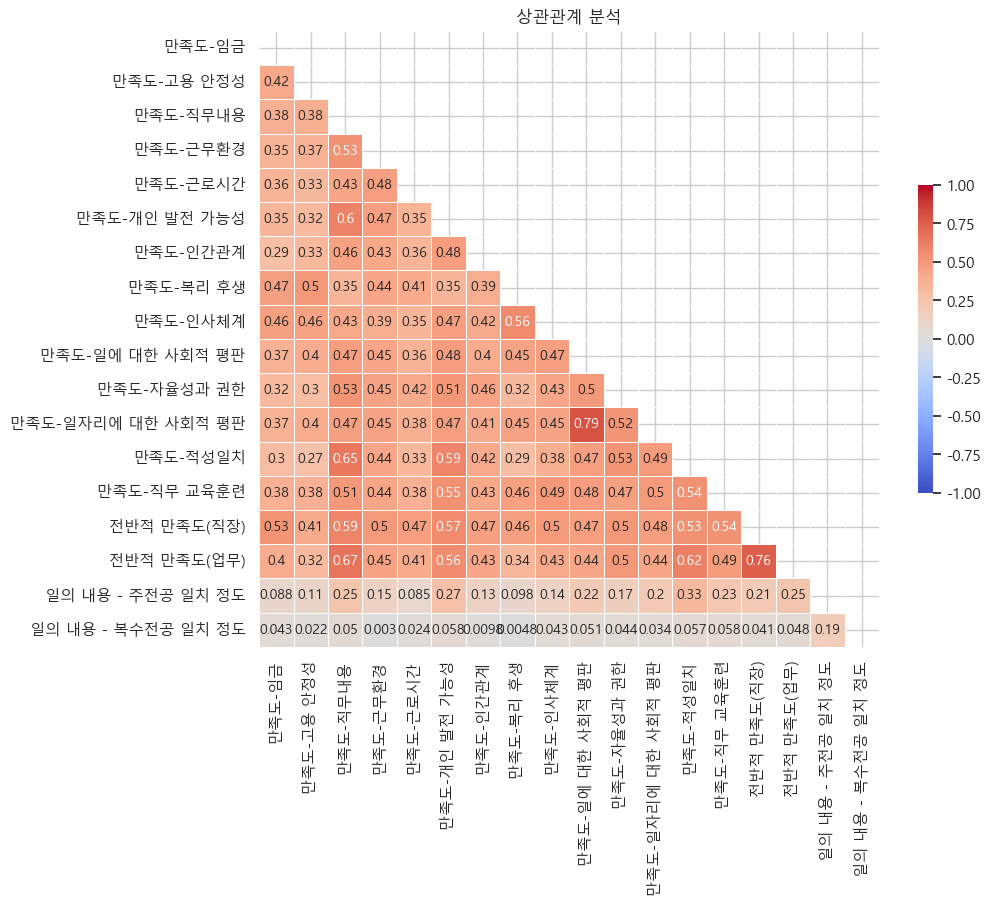

In [431]:
# 데이터 선택
correlation_data2 = df_cleaned[['a126', 'a127', 'a128', 'a129', 'a130', 'a131', 'a132', 'a133', 'a134', 'a135', 'a136', 'a137', 'a138', 'a139', 'a140', 'a141', 'a144', 'a145']]

# 컬럼 이름 바꾸기
correlation_data2.columns = [
    '만족도-임금',
    '만족도-고용 안정성',
    '만족도-직무내용', 
    '만족도-근무환경', 
    '만족도-근로시간', 
    '만족도-개인 발전 가능성', 
    '만족도-인간관계', 
    '만족도-복리 후생',
    '만족도-인사체계',
    '만족도-일에 대한 사회적 평판',
    '만족도-자율성과 권한',
    '만족도-일자리에 대한 사회적 평판',
    '만족도-적성일치',
    '만족도-직무 교육훈련',
    '전반적 만족도(직장)',
    '전반적 만족도(업무)',
    '일의 내용 - 주전공 일치 정도',
    '일의 내용 - 복수전공 일치 정도'
]

# 상관계수 계산
correlation_matrix2 = correlation_data2.corr()

# 삼각형 마스크
mask = np.zeros_like(correlation_matrix2, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, 
            cmap='coolwarm', 
            annot=True, 
            mask=mask, 
            linewidths=.5, 
            cbar_kws={"shrink": .5}, 
            vmin=-1, vmax=1)
plt.title("상관관계 분석")
plt.show()

> 분석

직장 만족도에 직장 요인의 대부분이 높은 상관관계를 보였으며,  
주전공 및 복수전공의 일치 정도는 낮은 상관관계를 보임.

직장의 전반적 만족도는 '직무내용(0.59)', '개인의 발전 가능성(0.57)', '교육훈련(0.54)', 적성일치(0.53)', '임금(0.53)', '근무환경(0.5)', '인사체계(0.5)', '자율성과 권한(0.5)' 순으로 높은 상관을 보였음.  
업무의 전반적 만족도에서는 '직무내용(0.67)', '적성일치(0.62)', '개인의 발전 가능성(0.56)', 자율성과 권한(0.5)' 순으로 높은 상관관계를 나타냄.

# IV. 분석 결과

**💎 주요 인사이트 🔎**
  ---
   
1. **대학 졸업자 임금 현황**
   
* 성별과 학제별 월 평균 임금 현황 성별과 학제별 월 평균 임금 현황을 분석한 결과, 남성의 평균 월 소득이 여성에 비해 높게 나타났다.  
  또한, 소득의 분포는 일반 대학이 가장 넓고 교육대학이 가장 좁은 것으로 나타났다.  
  일반 대학과 전문 대학에서는 월 400만원 이상의 높은 소득과 월 소득 0에 근접한 낮은 소득이 동시에 나타나는 이상치가 다수 존재했다.  
  이는 다양한 성별과 학제가 소득 분포에 영향을 미치고 있음을 시사한다.  

* 전공별 임금 현황 전공별 임금 현황을 살펴본 결과, 평균 임금의 차이는 크지 않지만 분포에서 큰 차이가 나타났다.  
  남성의 경우 의약과 교육 계열에서, 여성의 경우 의약과 교육, 공학 계열에서 높은 평균 임금을 보인 반면, 남성은 예체능 계열에서, 여성은 인문, 사회, 자연, 예체능 계열에서 낮은 평균 임금을 보임.  
  이는 특정 전공이 경제적으로 더 유리한 위치를 제공할 수 있음을 시사함. 특히, 예체능 계열은 많은 만족도 항목에서 낮은 점수를 기록했으며, 임금과 인사체계에서 특히 낮은 만족도를 보였기에 정책적 지원이 요구된다.  

---
2. **대학 졸업자 만족도 현황**
* 학제별 만족도를 비교했을 때, 교육대학 남성의 대학 만족도가 3.4로 여성 3.5에 비해 낮았으며, 직장 만족도도 남성 3.9로 여성 4.15보다 낮았다.  
  이는 남성과 여성이 교육대학 내에서 다른 만족도를 경험하고 있음을 시사하므로, 교육대학 및 교육현장의 남성의 어려움을 파악하고 지원할 필요성이 있다.

---
3. **대학 졸업자 이직 현황**
* 교육 전공 대졸자의 높은 만족도와 높은 이직률 교육 전공 대졸자가 높은 만족도를 보이는 동시에 높은 이직률을 보인다는 점에서 주목할 만하다.  
  만족도 조사 항목을 분석한 결과, 임금과 인사체계에 대한 불만족이 이직률의 주요 원인인 것으로 파악된다.  
  이는 교육 분야가 직무 만족도는 높지만, 재정적인 보상 및 승진 체계의 부족으로 직업 유지가 방해될 수 있다는 사실을 반영한다.  
---

4. **대학 졸업자 취업 관련 상관 관계 분석**
* 취업 요인 - 취업 상황 - 만족도 간 상관관계 대학 만족도와 직장 만족도의 상관관계가 낮게 나타났다. 이는 대학의 만족도가 직장 만족도로 이어지지 않음을 시사한다.  
  대학에서의 만족도가 직장에서의 만족도로 연결되지 않는다는 점에서, 대학 교육이 직장 생활의 질에 직접적인 영향을 미치지 않는다는 결론을 내릴 수 있다.  
  이에 대학과 취업시장 간 연계 강화가 요구된다.  

* 부모 요인 - 자녀 대학, 직장 생활 간 상관관계 부모의 자산과 자녀의 대학, 직장 만족도, 자녀의 임금 간의 상관관계는 0.2 수준으로 매우 낮게 나타났다.  
   이는 부모의 경제적 배경이 자녀의 직업 만족도와 임금에 큰 영향을 미치지 않음을 의미한다.  

* 주전공 및 복수전공과 일의 내용의 일치 정도와 업무 만족도의 상관관계는 0.048로 매우 낮게 나타났다.  
  반면, 직무내용, 개인발전가능성, 적성 일치가 각각 0.59, 0.57, 0.67, 0.62의 높은 상관을 보였다.  
  이는 자신이 좋아하는 일을 발견하고 그에 맞는 직무를 선택하는 것이 직장 생활의 만족도에 큰 영향을 미친다는 것을 의미하며, MZ 세대의 직장 만족도를 높이기 위해서는 적성과 일치하는 직무 선택이 중요하다는 결론을 도출할 수 있다.
  따라서 대학생 및 사회초년생의 자아 탐색 및 실현이 가능하도록 대학 및 사회의 유기적 연결과 실질적인 지원이 촉구된다. 이를 통하여 청년의 대학 만족도와 전공 만족도, 직장 만족도를 모두 높일 수 있을 것이다.

# V. 결론 및 제언

**분석의 한계점**
---
1. 본 분석은 시계열 데이터를 사용하지 않아 추이를 살펴볼 수 없었다.  
   추후 분석을 통해 시계열 데이터를 포함한 분석을 통해 시간에 따른 변화와 추이를 파악하는 것이 필요하다.  

3. 현재 MZ 세대를 중심으로 분석이 이루어졌으며, 중장년층의 데이터와 비교 분석을 통해 세대 간의 차이를 더욱 명확히 파악할 필요가 있다.  
   중장년층의 데이터를 포함한 분석에서는 다양한 세대의 직장 생활과 만족도를 비교할 수 있을 것이며, 보다 포괄적인 결론을 도출할 수 있을 것으로 예상된다.  

4. 현재 데이터셋은 학과를 대계열로 분류하고 있으며, 중계열, 소계열별 전공을 분석하지 않아 전공별 세부적인 차이를 충분히 반영하지 못하고 있다.  
   향후 세분화된 전공 분석을 통해 더욱 자세한 결과를 도출할 수 있을 것이다.  

5. 전공 계열별 산업군 분포에 대한 자세한 분석이 요청된다.  
   산업군 내에서 전공 계열의 분포를 살펴보는 것은 각 전공이 어떤 산업에 진출하는지, 그 산업에서 어떤 역할을 하는지를 파악하는 데 도움이 될 것이다.  

7. 직업군 분류 체계의 포괄성 현재 직업군 분류 체계가 다소 포괄적이기에 세부적인 직무 분류가 어려운 점이 있다.  
   향후 분석에서는 보다 세분화 된 직업군 분류 체계를 도입하여 더욱 상세한 분석을 시도할 수 있을 것이다. 

**결론**
---
* 이번 분석을 통해 교육 전공 대졸자의 높은 만족도와 이직률, 성별과 학제별 월 평균 임금 현황, 전공별 임금 현황, 학제별 만족도, 취업 요인 - 취업 상황 - 만족도 간 상관관계,  
  부모 요인 - 자녀 대학, 직장 생활 간 상관관계, 주전공과 복수전공과 직장 만족도 간 상관관계를 파악할 수 있었다.  
* 특히, 적성과 일치하는 직무 선택이 직장 생활의 만족도에 큰 영향을 미친다는 점이 주목할 만한 점이다.  
  MZ 세대에게는 무엇보다도 자신의 적성을 발견하고, 이를 바탕으로 직무를 선택하는 것이 중요하다는 결론을 도출할 수 있었다.
* 앞으로의 분석에서는 시계열 데이터를 포함하고, 중장년층과의 비교 분석, 세분화된 전공 분석, 전공 계열별 산업군 분포 분석, 직업군 분류 체계의 세분화를 통해 더욱 자세하고 포괄적인 결론을 도출할 수 있을 것이다.  
  이를 통해 다양한 직업군과 전공 계열에서의 직장 생활 만족도를 높일 수 있는 방안을 마련하는 데 도움이 되기를 바라며 분석을 마친다.

# 참고 문헌

[데이터]
- GOMS2019

[문헌]  
박경호 외(2017).교육격차 실태 종합분석.한국교육개발원.  
한국고용정보원(2019).2019 대졸자 취업정보.  
한국고용정보원(2019).대졸자직업이동경로조사 통계정보보고서.  
한국고용정보원(2019).GOMS자료 이용시 유의 사항.  
한국교육개발원(2019).고등교육기관졸업자취업통계조사연보.  